# Wine Quality analysis using ML


## Project done by:
## Name:Asiya Banu
## College name:Don Bosco Institute of Technology

##### Since there are two varieties of wine i.e red wine and white wine so there are two datasets available particularly one for the red wine and another for the white wine.
##### At first I am analysing red wine dataset.

### (Red wine dataset)

In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [2]:
#Loading dataset
red_wine = pd.read_csv('C:\\Users\\asiya\\Downloads\\winequality-red.csv')

In [3]:
#Let's check how the data is distributed
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
#Lets check the total number of rows and columns present in the dataset
red_wine.shape

(1599, 12)

In [5]:
# Checking for Missing Values
print(red_wine.isna().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
#Information about the data columns
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Problem Statement:
## Problem Definition:
### The red wine dataset contains different chemical information about red wine. It has 1599 instances with 12 variables each. The dataset is good for classification and regression tasks. The model can be used to predict red wine quality.
### Perform various different algorithms like regression, decision tree, random forests, etc and differentiate between the models and analyse their performances.
### Here I am Performing various different Classification algorithms like Logistics Regression, Decision Tree Classifier, Random Forest Classifier, Stochastic Gradient Descent Classifier, Naive Bayes Classifier, K-NearestNeighbours Classifier and Support Vector Machine(SVM) and trying to differentiate between the models and analyse their performances.

## VISUALIZATION

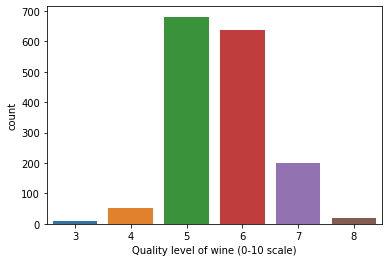

In [7]:
# Visualization  with countplots
red_wine["quality"] = pd.Categorical(red_wine["quality"])
sns.countplot(x="quality", data=red_wine)
plt.xlabel("Quality level of wine (0-10 scale)")
plt.show()

In [219]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

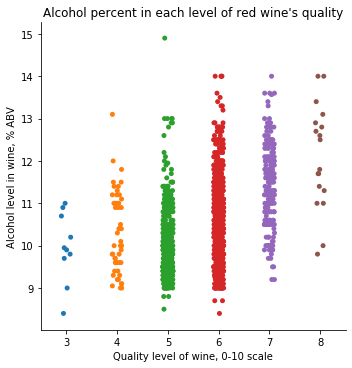

In [8]:
# Visualization  with factorplots
sns.factorplot(x="quality", y="alcohol", data=red_wine, kind="strip")
plt.xlabel("Quality level of wine, 0-10 scale")
plt.ylabel("Alcohol level in wine, % ABV")  #Alcohol By Volume(ABV)
plt.title("Alcohol percent in each level of red wine's quality")
plt.show()

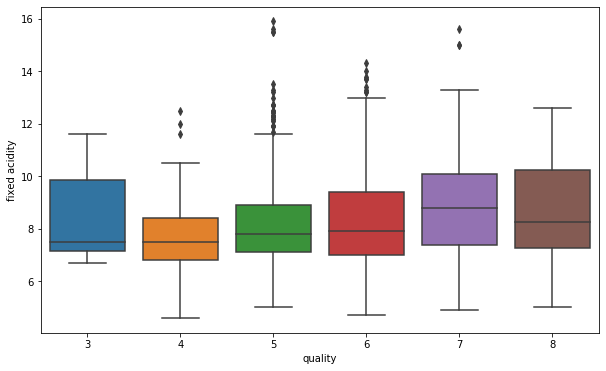

In [9]:
#Target variable is Quality. So we will plot a boxplot for each variable against target variable.
fig = plt.figure(figsize = (10,6))
sns.boxplot('quality', 'fixed acidity', data = red_wine)

### Here we see that fixed acidity does not give any specification to classify the quality.

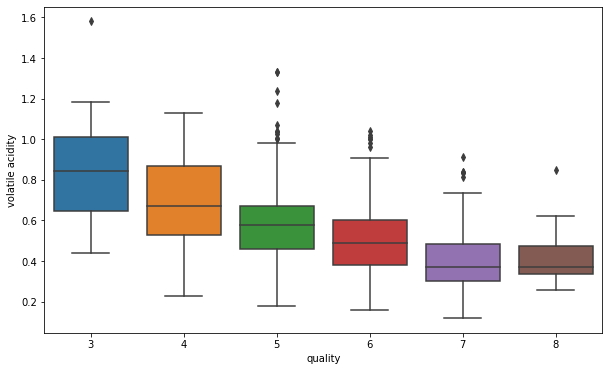

In [10]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'volatile acidity', data = red_wine)

### Here we see that its quite a downing trend in the volatile acidity as we go higher the quality.

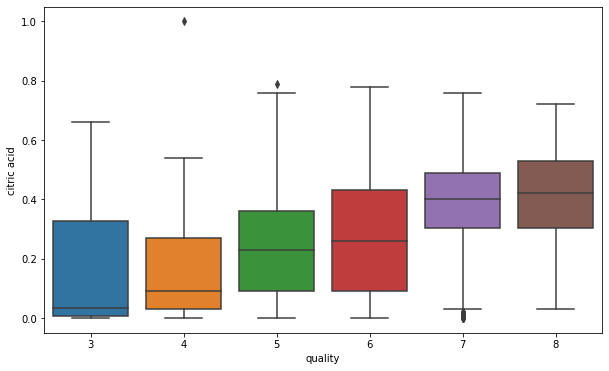

In [11]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'citric acid', data = red_wine)

### Composition of citric acid goes higher as we go higher in the quality of the wine.

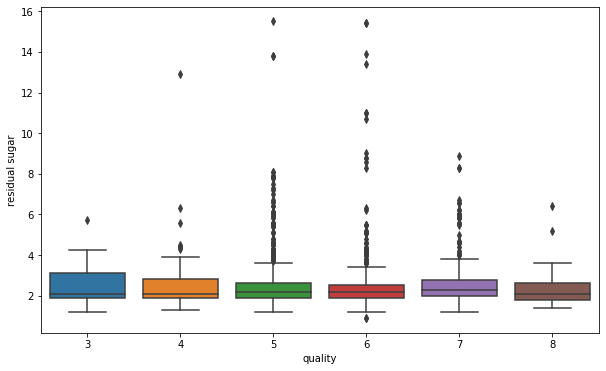

In [12]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'residual sugar', data = red_wine)

### Composition of residual sugar is uniformly distributed over the different quality level.

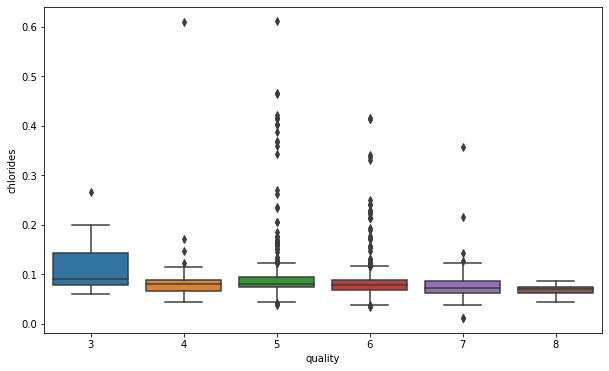

In [13]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'chlorides', data = red_wine)

### Composition of chlorides also goes down as we go higher in the quality of the wine.

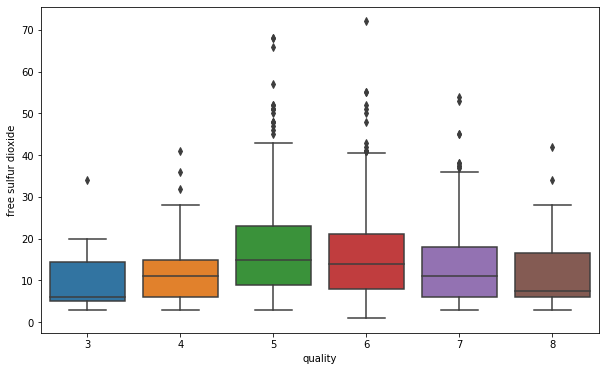

In [14]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'free sulfur dioxide', data = red_wine)

### Composition of free sulphur dioxide somewhat increases a bit in the quality levels of 5 and 6 and then again decreases.

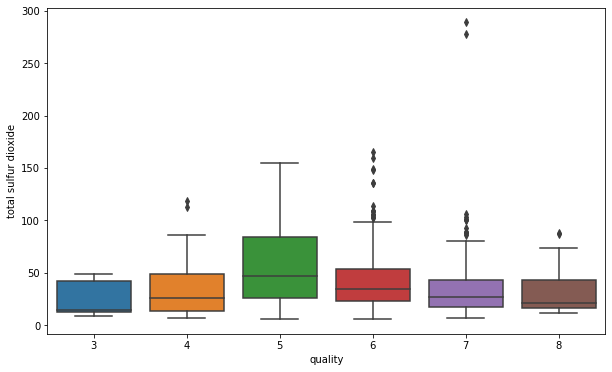

In [15]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = red_wine)

### Composition of total sulphur dioxide lowers towards the high quality levels with an sudden  increase in the quality level of 5.

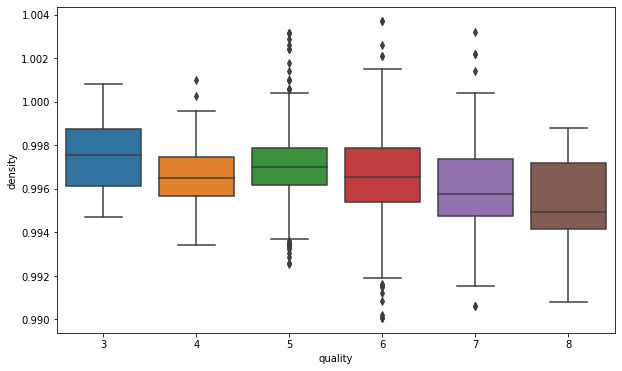

In [18]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'density', data = red_wine)

### Density of the red wine seems to be larger at the low quality levels and tends to decrease towards the high quality levels.

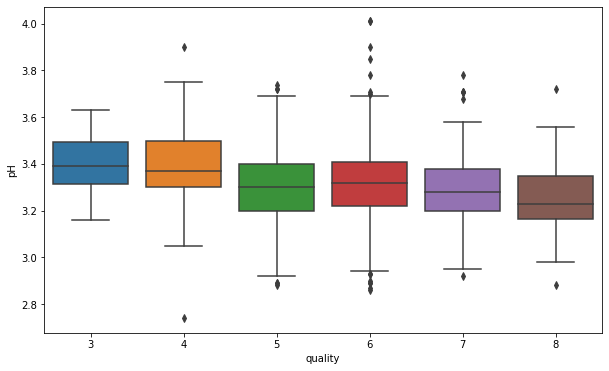

In [19]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'pH', data = red_wine)

### The pH levels of the red wine seems to be uniformly distributed with the quality levels with the little increase in the pH at the quality level 3 and 4.

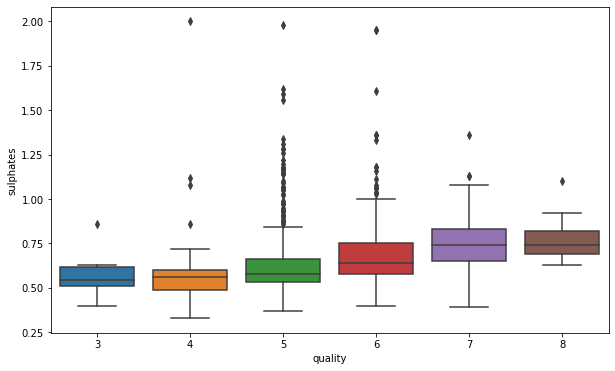

In [20]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'sulphates', data = red_wine)

### Sulphates level goes higher with the quality of wine.

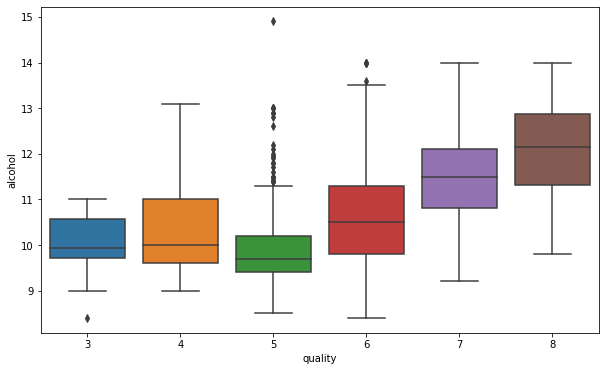

In [21]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'alcohol', data = red_wine)

### Alcohol level also goes higher as the quality of wine increases.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD584AFC88>,
      dtype=object)

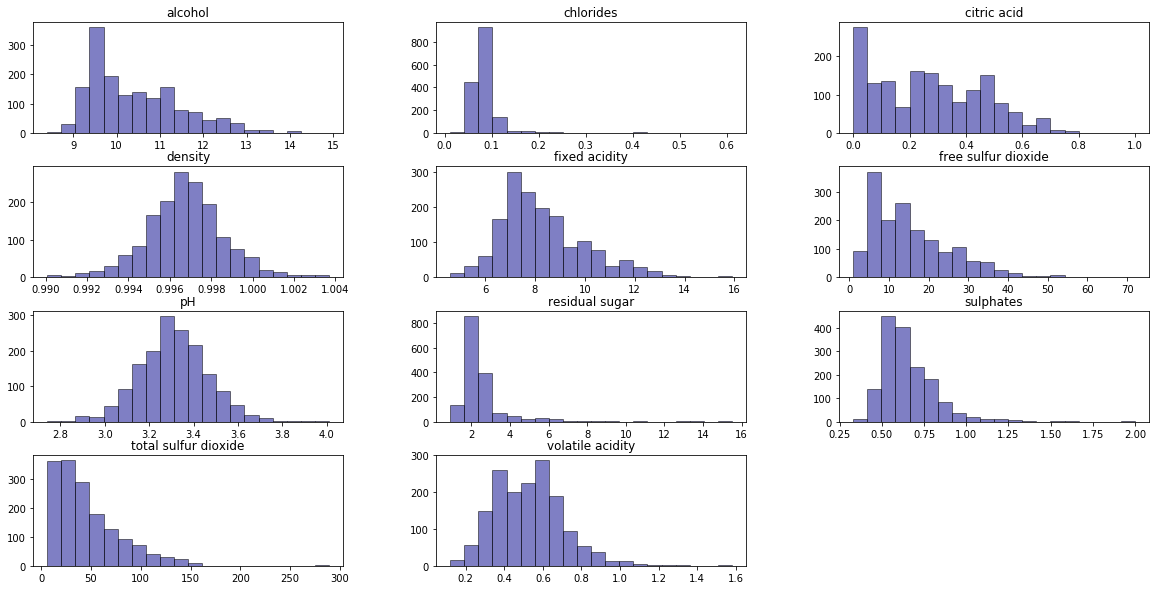

In [22]:
#Visualization using Histogram
red_wine.iloc[:,:-1].hist(bins=20,figsize=(20,10),
                           grid=False,edgecolor='black',alpha=0.5,color='darkblue')

### Histogram plots are very clear as we can see that all the 11 variables and their distribution in the red wine is clearly depicted.

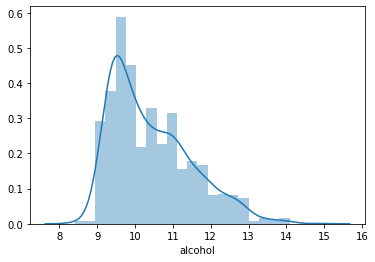

In [7]:
#Visualization using distplot
sns.distplot(red_wine.alcohol) #distplot shows how alcohol content is distributed in the red wine

In [23]:
#boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening.
red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

In [24]:
#Observations from the above data description.
#fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers.
#volatile acididty - similar reasoning.
#citric acid - seems to be somewhat uniformly distributed.
#residual sugar - min - 0.9, max - 15!! Waaaaay too much difference.Could explain the outliers. 
#chlorides - Min - 0.012, max - 0.611

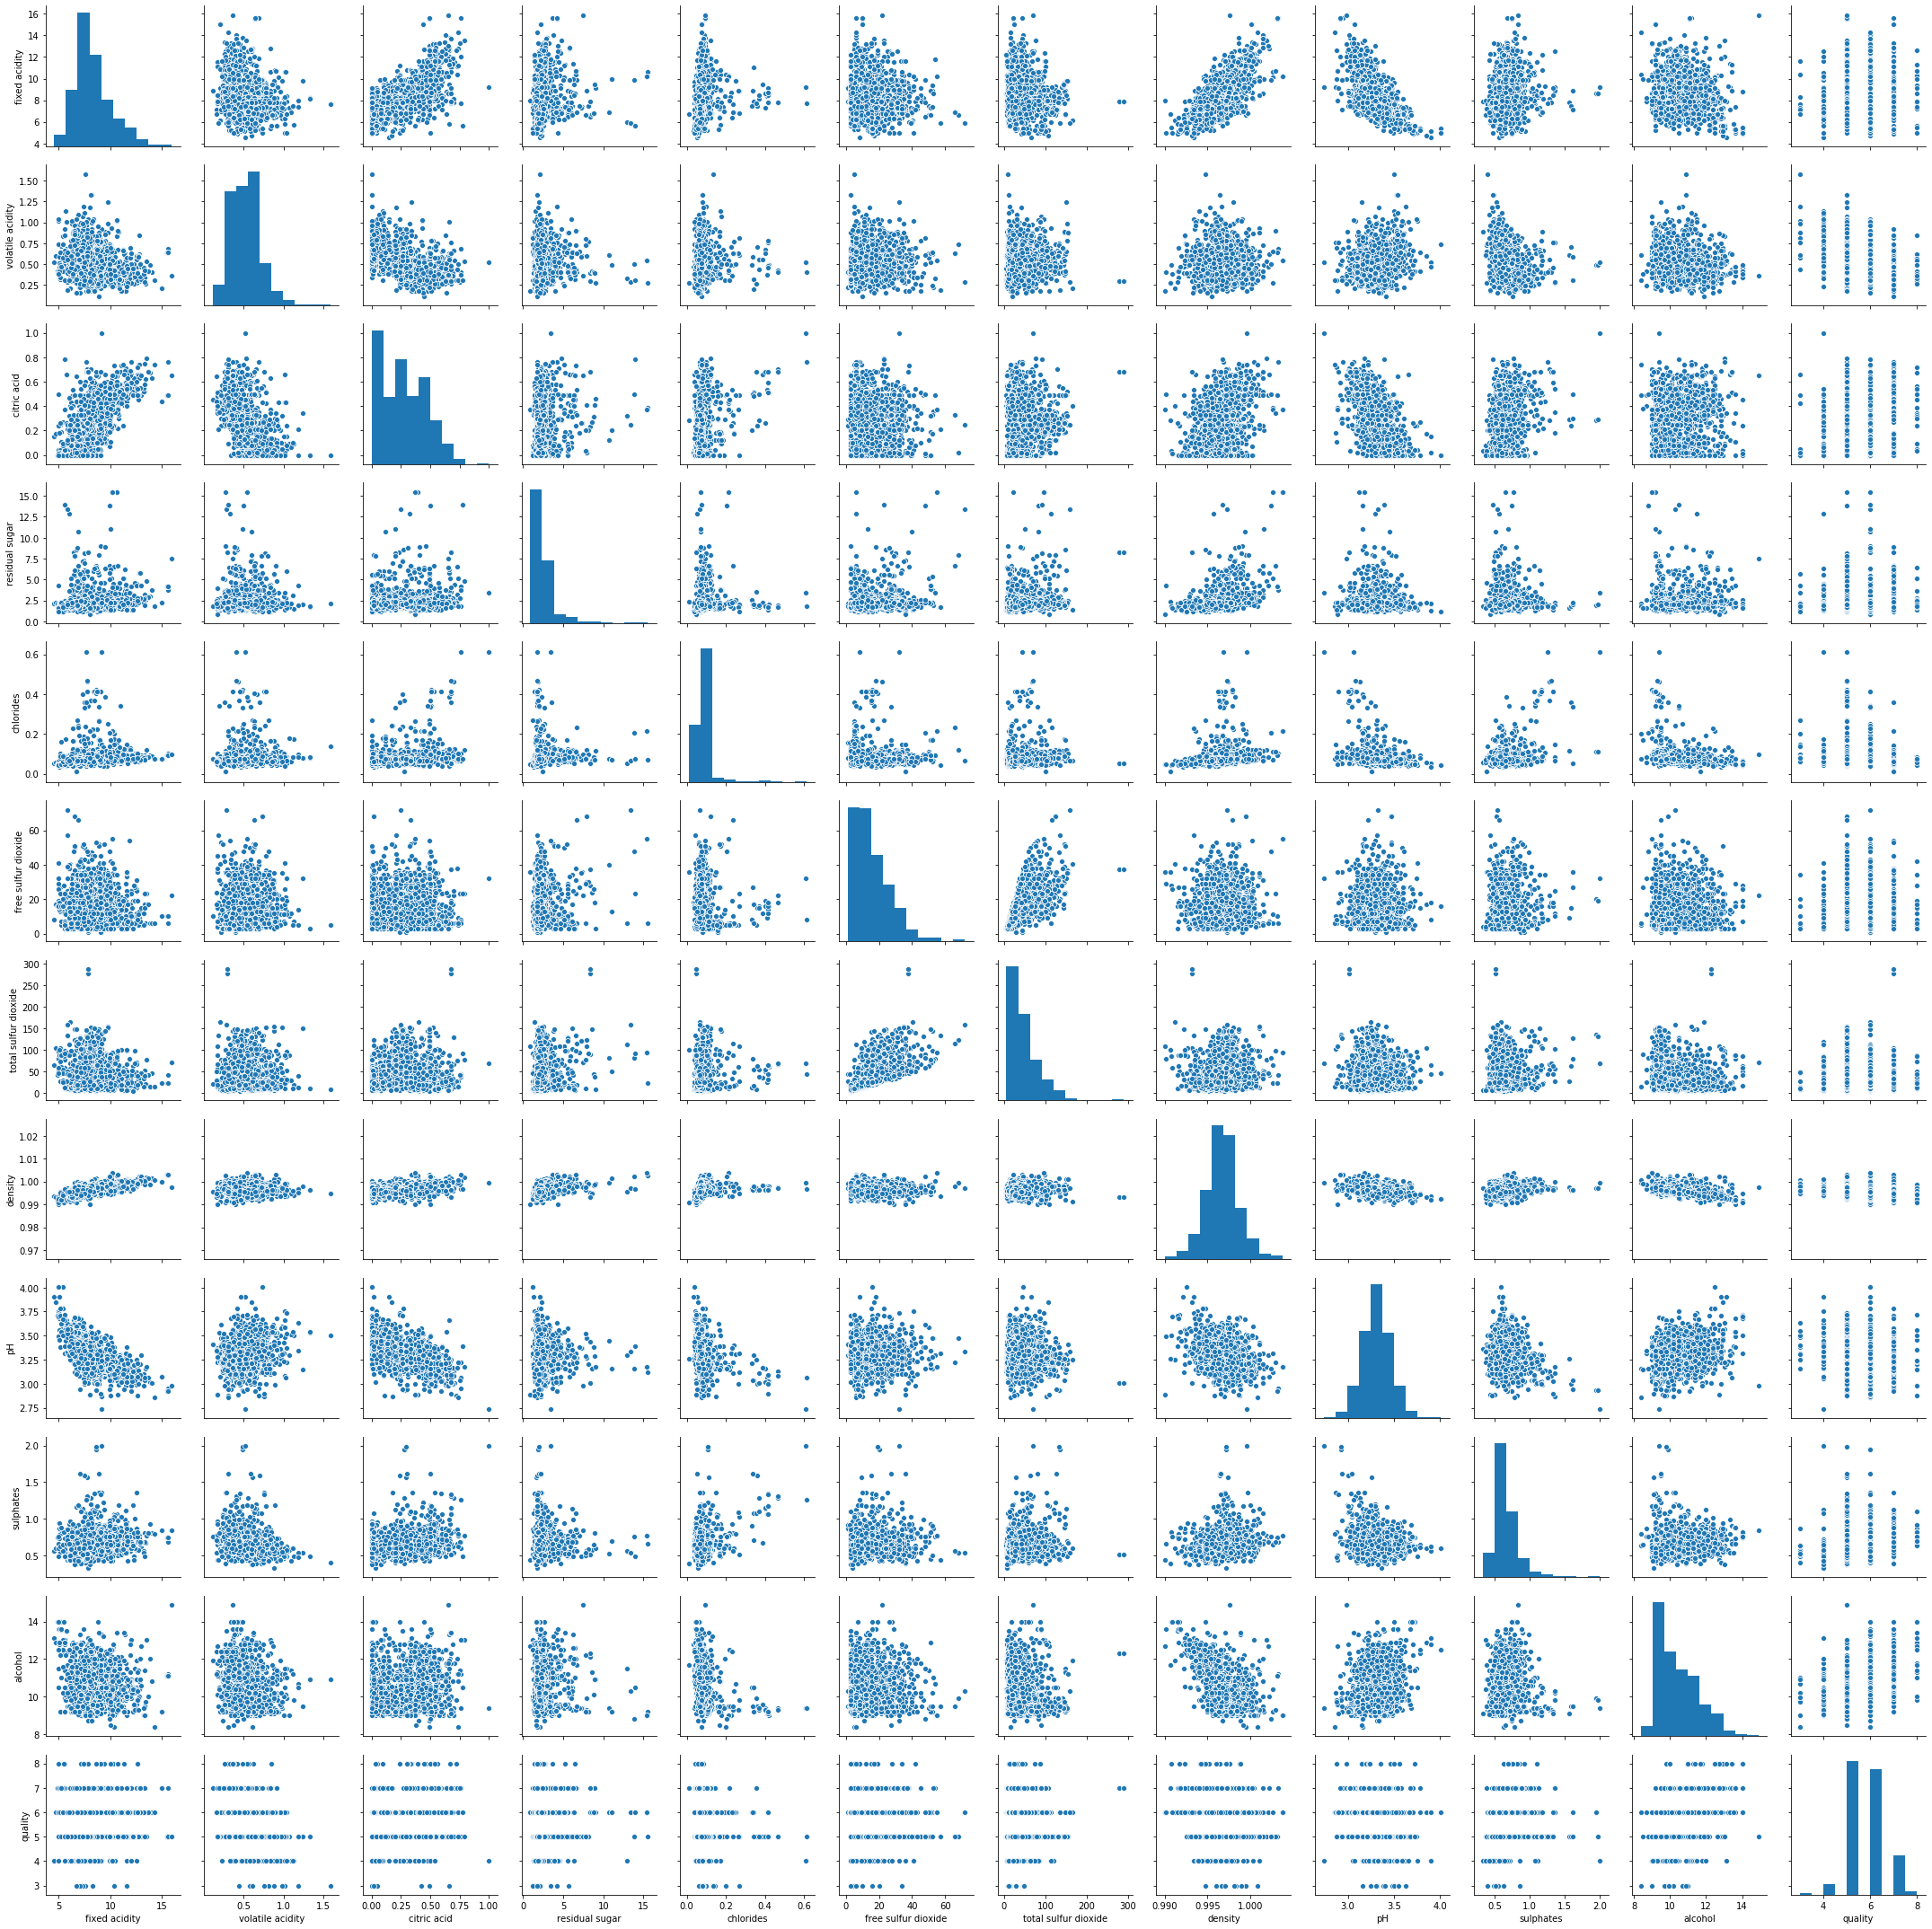

In [25]:
#Check correleation between the variables using Seaborn's pairplot. 
sns.pairplot(red_wine)

### No correlation between the fields as seen on the pairplot

# Correlation Matrix
#### Next I wanted to see the correlations between the variables that I’m working with using correlation matrix. This allows me to get a much better understanding of the relationships between my variables quick glimpse.
#### Immediately, I can see that there are some variables that are strongly correlated to quality. It’s likely that these variables are also the most important features in our machine learning model.

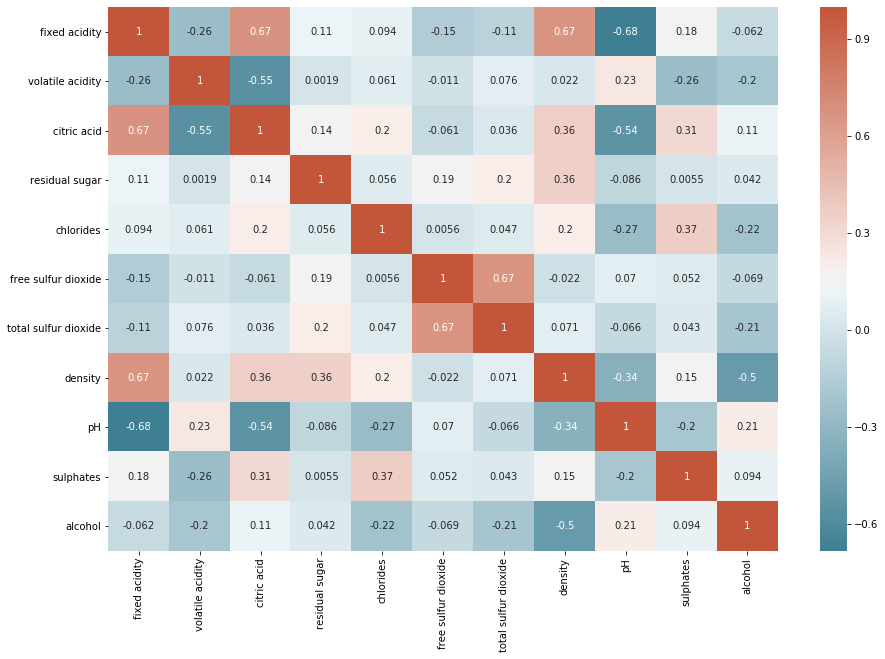

In [26]:
corr = red_wine.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Preprocessing Data for performing Machine learning algorithm

In [55]:
# Create Classification version of target variable
red_wine['goodquality'] = [1 if x >= 7 else 0 for x in red_wine['quality']]
# Separate feature variables and target variable
X = red_wine.drop(['quality','goodquality'], axis = 1)
y = red_wine['goodquality']

In [4]:
red_wine.shape

(1599, 13)

In [28]:
red_wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol quality  goodquality  
0      9.4       5            0  
1      9.8       5            0  
2      9.8       5            0  
3      9.8       6            0  
4      9.4       5            0  
5      9.4       5            0  
6      9.4       5            0  
7     10.0       7            1  
8      9.5       7            1  
9     10.5       5            0

In [29]:
red_wine['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

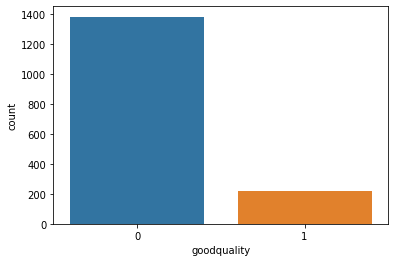

In [30]:
sns.countplot(red_wine['goodquality'])

In [31]:
# Filtering the data only for good quality
wine_temp = red_wine[red_wine['goodquality']==1]
wine_temp.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     217.000000        217.000000   217.000000      217.000000   
mean        8.847005          0.405530     0.376498        2.708756   
std         1.999977          0.144963     0.194438        1.363026   
min         4.900000          0.120000     0.000000        1.200000   
25%         7.400000          0.300000     0.300000        2.000000   
50%         8.700000          0.370000     0.400000        2.300000   
75%        10.100000          0.490000     0.490000        2.700000   
max        15.600000          0.915000     0.760000        8.900000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  217.000000           217.000000            217.000000  217.000000   
mean     0.075912            13.981567             34.889401    0.996030   
std      0.028480            10.234615             32.572238    0.002201   
min      0.012000             3.000000              7.000000    0.990640   
25%      0.062000             6.000000             17.000000    0.994700   
50%      0.073000            11.000000             27.000000    0.995720   
75%      0.085000            18.000000             43.000000    0.997350   
max      0.358000            54.000000            289.000000    1.003200   

               pH   sulphates     alcohol  goodquality  
count  217.000000  217.000000  217.000000        217.0  
mean     3.288802    0.743456   11.518049          1.0  
std      0.154478    0.134038    0.998153          0.0  
min      2.880000    0.390000    9.200000          1.0  
25%      3.200000    0.650000   10.800000          1.0  
50%      3.270000    0.740000   11.600000          1.0  
75%      3.380000    0.820000   12.200000          1.0  
max      3.780000    1.360000   14.000000          1.0

In [32]:
# Filtering the data only for bad  quality
wine_temp2 = red_wine[red_wine['goodquality']==0]
wine_temp2.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1382.000000       1382.000000  1382.000000     1382.000000   
mean        8.236831          0.547022     0.254407        2.512120   
std         1.682726          0.176337     0.189665        1.415778   
min         4.600000          0.160000     0.000000        0.900000   
25%         7.100000          0.420000     0.082500        1.900000   
50%         7.800000          0.540000     0.240000        2.200000   
75%         9.100000          0.650000     0.400000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1382.000000          1382.000000           1382.000000  1382.000000   
mean      0.089281            16.172214             48.285818     0.996859   
std       0.049113            10.467685             32.585604     0.001808   
min       0.034000             1.000000              6.000000     0.990070   
25%       0.071000             8.000000             23.000000     0.995785   
50%       0.080000            14.000000             39.500000     0.996800   
75%       0.091000            22.000000             65.000000     0.997900   
max       0.611000            72.000000            165.000000     1.003690   

                pH    sulphates      alcohol  goodquality  
count  1382.000000  1382.000000  1382.000000       1382.0  
mean      3.314616     0.644754    10.251037          0.0  
std       0.154135     0.170629     0.969664          0.0  
min       2.740000     0.330000     8.400000          0.0  
25%       3.210000     0.540000     9.500000          0.0  
50%       3.310000     0.600000    10.000000          0.0  
75%       3.410000     0.700000    10.900000          0.0  
max       4.010000     2.000000    14.900000          0.0

#### By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average.

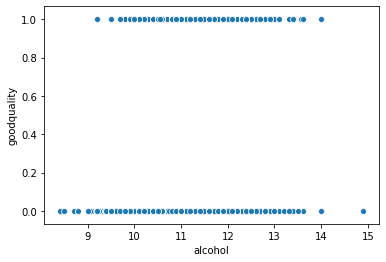

In [33]:
#Lets try to see the relationship between the variables goodquality and the alocohol.
sns.scatterplot(x='alcohol',y='goodquality',data=red_wine)

### From the above scatterplot we can see that the alcohol content for the goodquality=1 (means good qualiy wine) is higher and alcohol content for the goodquality=0 (means bad quality wine) is lower. 

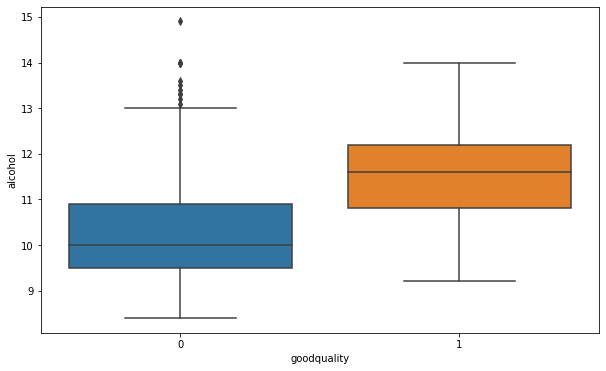

In [14]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'goodquality', y = 'alcohol', data = red_wine)

### From the above boxplot we can see that the alcohol content for the wine having goodquality=1 (means good qualiy wine) is higher and alcohol content for the wine having goodquality=0 (means bad quality wine) is lower. 

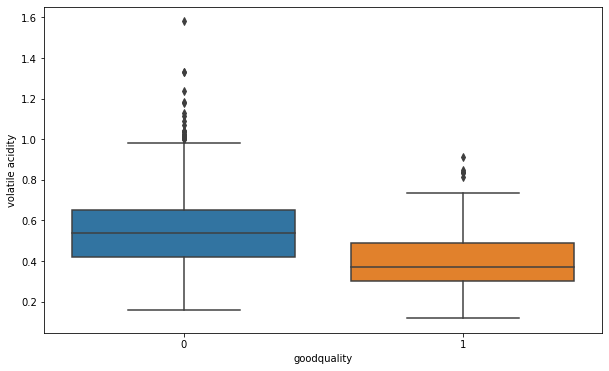

In [13]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'goodquality', y = 'volatile acidity', data = red_wine)

### From the above boxplot we can see that the volatile acidity content for the wine having goodquality=0 is heigher and volatile acidity content for the wine having goodquality=1 is lower. 

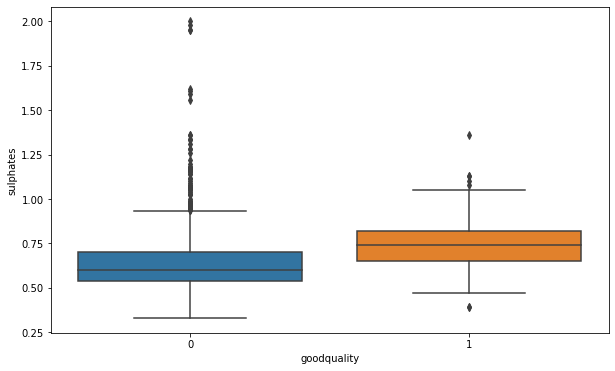

In [11]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'goodquality', y = 'sulphates', data = red_wine)

### From the above boxplot we can see that the sulphates content for the wine having goodquality=0 is lower and sulphates content for the wine having goodquality=1 is heigher. 

## Preparing Data for Modelling


In [56]:
# Normalize feature variables
X_features = X
X = StandardScaler().fit_transform(X)#Applying Standard scaling to get optimized result
                                    #cleaning and normalizing the input features


## Splitting data into training and testing set

In [57]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
#Let's Check how our train and test data is distributed
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


### Our training and testing data is ready now to fit into various machine learning algorithms.

## Modelling

# For this Project,I have applied 7  different types of Classification Algorithms listed Below:

#### 1.Logistic Regression 
#### 2.Decision Tree Classifier 
#### 3.Random Forest Classifier
#### 4.Stochastic Gradient Descent Classifier 
#### 5.Naive Bayes Classifier
#### 6.K-NearestNeighbours Classifier
#### 7.Support Vector Machine(SVM)

## 1.Logistic Regression 

In [58]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [59]:
print(classification_report(y_test, lr_predict))
lr_acc_score = accuracy_score(y_test, lr_predict)
print("The Accuracy score obtained by the Logistic Regression is->",(lr_acc_score*100),"%")

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320

The Accuracy score obtained by the Logistic Regression is-> 86.5625 %


Confusion Matrix:
 [[264   9]
 [ 34  13]]


Text(0.5, 257.44, 'Predicted label')

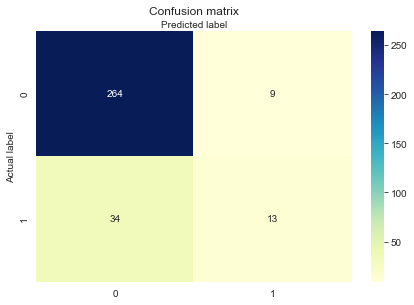

In [60]:
#Confusion matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
print('Confusion Matrix:\n',lr_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(lr_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Test vs Predicted
#### Compute traning and test data accuracy 

In [61]:
train_accuracy= lr.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = lr.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 88.58483189992181 %
Test data Accuracy-> 86.5625 %


#### Calculation of Errors 

In [62]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,lr_predict))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,lr_predict)))


Mean Squared Error(MSE): 0.134375
Root Mean Squared Error (RMSE): 0.3665719574653795


#### ROC_AUC_SCORE 

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, lr_predict)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.6218143558569091


In [71]:
!pip install plot_metric

### ROC Curve

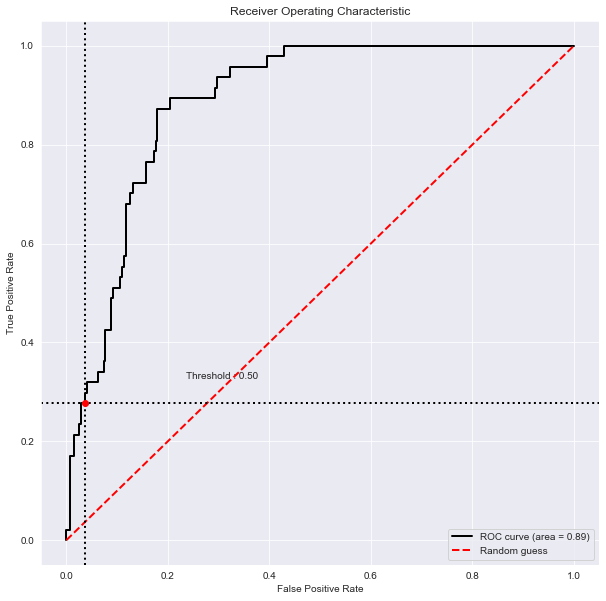

In [64]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = lr.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 2.Decision Tree Classifier

In [67]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [68]:
#print confusion matrix and accuracy score
print(classification_report(y_test, dt_predict))
dt_acc_score = accuracy_score(y_test, dt_predict)
print('The Accuracy score obtained by the Decision Tree Classifier is->',dt_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       273
           1       0.57      0.57      0.57        47

    accuracy                           0.88       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.88      0.88      0.88       320

The Accuracy score obtained by the Decision Tree Classifier is-> 87.5 %


#### Conclusion:A bit improvement in the Accuracy score given by the Decision Tree classifier as compared to the accuracy score of Logistic Regression.

Confusion Matrix:
 [[253  20]
 [ 20  27]]


Text(0.5, 257.44, 'Predicted label')

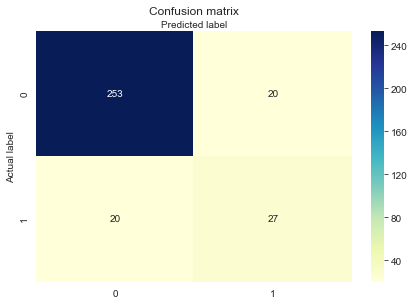

In [69]:
#Confusion matrix for Decision Tree Classification
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
print('Confusion Matrix:\n',dt_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(dt_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#### Test vs Predicted
#### Compute traning and test data accuracy 

In [70]:
train_accuracy= dt.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = dt.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 100.0 %
Test data Accuracy-> 87.5 %


#### Calculation of Errors 

In [71]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,dt_predict))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,dt_predict)))


Mean Squared Error(MSE): 0.125
Root Mean Squared Error (RMSE): 0.3535533905932738


### ROC_AUC_SCORE

In [72]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, dt_predict)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.7506040059231549


### ROC Curve

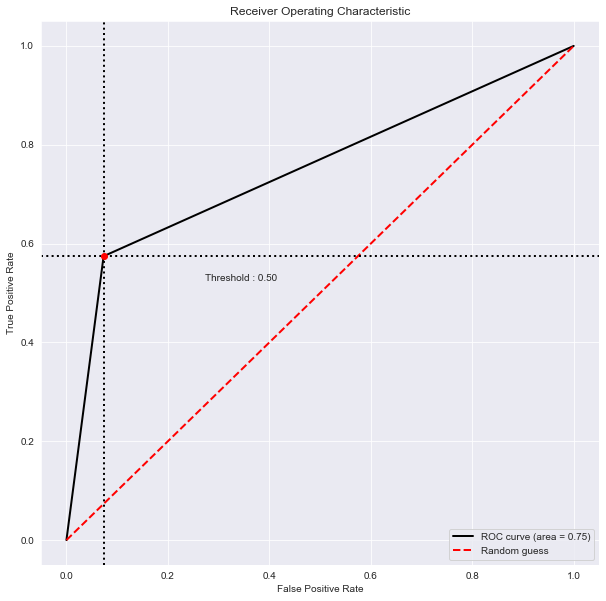

In [73]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = dt.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 3. Random Forest Classifier

In [74]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [75]:
print(classification_report(y_test, pred_rfc))
rf_acc_score = accuracy_score(y_test, pred_rfc)
print("The Accuracy score obtained by the Random Forest Classifier is->",rf_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.70      0.45      0.55        47

    accuracy                           0.89       320
   macro avg       0.81      0.71      0.74       320
weighted avg       0.88      0.89      0.88       320

The Accuracy score obtained by the Random Forest Classifier is-> 89.0625 %


#### Conclusion:Random Forest Classifier gives us a good accuracy score compared to the above two Classsifiers.

Confusion Matrix:
 [[264   9]
 [ 26  21]]


Text(0.5, 257.44, 'Predicted label')

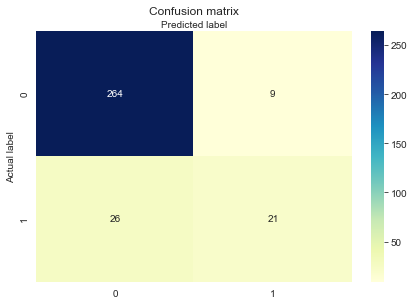

In [76]:
#Confusion matrix for the random forest classification
rf_conf_matrix = confusion_matrix(y_test, pred_rfc)
print('Confusion Matrix:\n',rf_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(rf_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#### Test vs Predicted
#### Compute traning and test data accuracy 

In [77]:
train_accuracy= rfc.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = rfc.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 98.90539483971853 %
Test data Accuracy-> 89.0625 %


### Calculation of Errors

In [78]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,pred_rfc))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,pred_rfc)))


Mean Squared Error(MSE): 0.109375
Root Mean Squared Error (RMSE): 0.33071891388307384


### ROC_AUC_SCORE

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred_rfc)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.7069207388356324


### ROC Curve

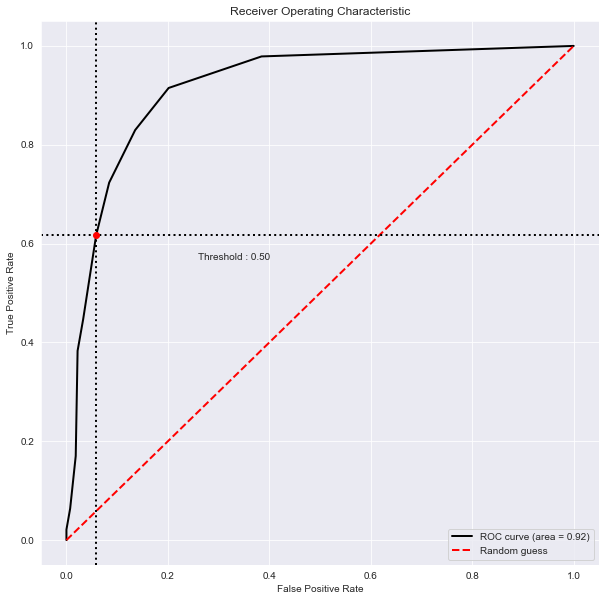

In [80]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = rfc.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 4. Stochastic Gradient Decent Classifier

In [88]:
sgd = SGDClassifier(loss="modified_huber")
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [89]:
#print confusion matrix and accuracy score
print(classification_report(y_test, pred_sgd))
sgd_acc_score = accuracy_score(y_test, pred_sgd)
print('The Accuracy score obtained by the Stochastic Gradient Decent Classifier is->',sgd_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       273
           1       0.50      0.64      0.56        47

    accuracy                           0.85       320
   macro avg       0.72      0.76      0.74       320
weighted avg       0.87      0.85      0.86       320

The Accuracy score obtained by the Stochastic Gradient Decent Classifier is-> 85.3125 %


#### Conclusion:Stochastic Gradient Decent Classifier gave a much lesser accuracy score as compared to all the above three Classification algorithms.

Confusion Matrix:
 [[243  30]
 [ 17  30]]


Text(0.5, 257.44, 'Predicted label')

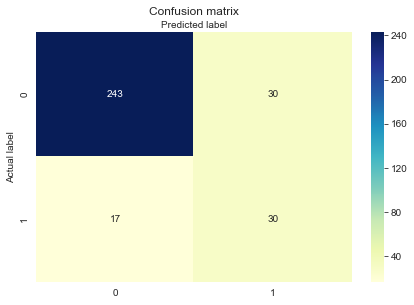

In [90]:
#Confusion matrix for the Stochastic Gradient Decent classification
sgd_conf_matrix = confusion_matrix(y_test, pred_sgd)
print('Confusion Matrix:\n',sgd_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(sgd_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### Test vs Predicted
### Compute training and test data accuracy

In [91]:
train_accuracy= sgd.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = sgd.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 83.89366692728694 %
Test data Accuracy-> 85.3125 %


### Calculation of Errors

In [92]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,pred_sgd))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,pred_sgd)))

Mean Squared Error(MSE): 0.146875
Root Mean Squared Error (RMSE): 0.3832427429188973


### ROC_AUC_SCORE

In [93]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred_sgd)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.7642038812251578


### ROC Curve

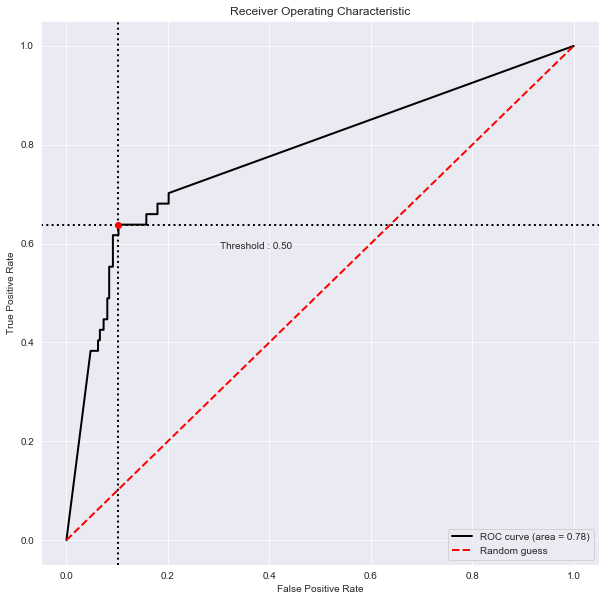

In [94]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = sgd.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 5.Naive Bayes Classifier

In [95]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

In [96]:
print(classification_report(y_test, nb_predict))
nb_acc_score = accuracy_score(y_test, nb_predict)
print('The Accuracy score obtained by the Naive Bayes Classifier is->',nb_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.49      0.79      0.60        47

    accuracy                           0.85       320
   macro avg       0.72      0.82      0.75       320
weighted avg       0.89      0.85      0.86       320

The Accuracy score obtained by the Naive Bayes Classifier is-> 84.6875 %


#### Conclusion:Naive Bayes Classifier gave approximately same Accuracy score as compared to the above SGD Classifier.

Confusion Matrix:
 [[234  39]
 [ 10  37]]


Text(0.5, 257.44, 'Predicted label')

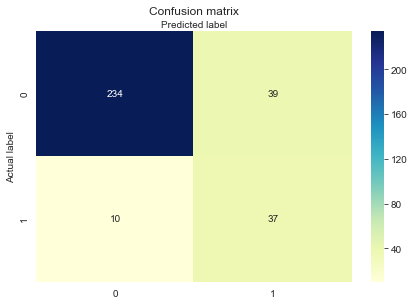

In [97]:
#Confusion matrix for the Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
print('Confusion Matrix:\n',nb_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(nb_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Test vs Predicted
### Compute training and test data accuracy

In [98]:
train_accuracy= nb.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = sgd.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 83.89366692728694 %
Test data Accuracy-> 85.3125 %


### Calculation of Errors

In [99]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,nb_predict))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,nb_predict)))

Mean Squared Error(MSE): 0.153125
Root Mean Squared Error (RMSE): 0.3913118960624632


### ROC_AUC_SCORE

In [100]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, nb_predict)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.8221884498480243


### ROC Curve

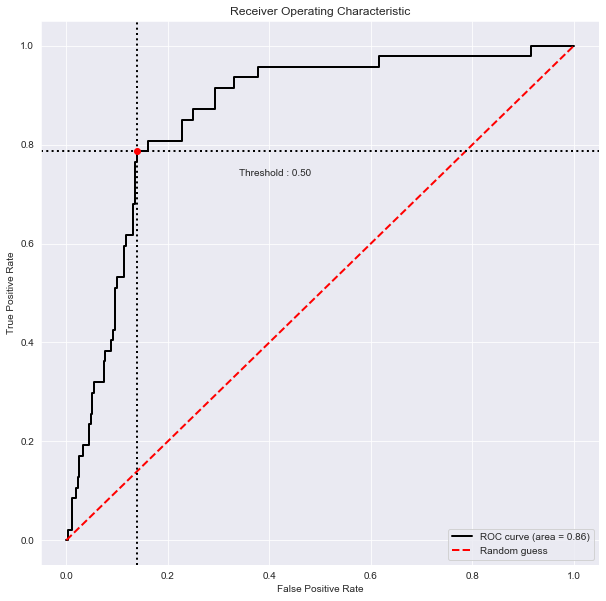

In [101]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = nb.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 6. K-NearestNeighbours Classifier

In [102]:
KN= KNeighborsClassifier(n_neighbors=5)  
KN.fit(X_train,y_train)
KN_predict=KN.predict(X_test)

In [103]:
print(classification_report(y_test, KN_predict))
KN_acc_score = accuracy_score(y_test, KN_predict)
print('The Accuracy score obtained by the K-NearestNeighbours Classifier is->',KN_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.86      0.88      0.87       320

The Accuracy score obtained by the K-NearestNeighbours Classifier is-> 87.8125 %


#### Conclusion:A larger improvement in the Accuracy score by K-NearestNeighbours Classifier as compared to the above Naive Bayes Classifier and SGD Classifier.

Confusion Matrix:
 [[262  11]
 [ 28  19]]


Text(0.5, 257.44, 'Predicted label')

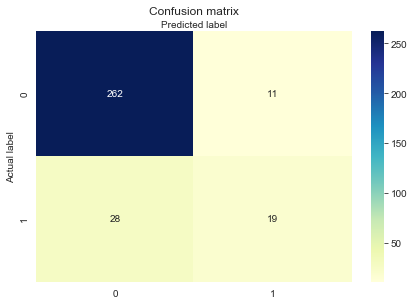

In [104]:
#Confusion matrix for the K-NearestNeighbours Classification
KN_conf_matrix = confusion_matrix(y_test, KN_predict)
print('Confusion Matrix:\n',KN_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(KN_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### Test vs Predicted
### Compute training and test data accuracy 

In [105]:
train_accuracy=KN.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = KN.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 91.08678655199375 %
Test data Accuracy-> 87.8125 %


### Calculation of Errors

In [106]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,KN_predict))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,KN_predict)))

Mean Squared Error(MSE): 0.121875
Root Mean Squared Error (RMSE): 0.3491060010942235


### ROC_AUC_SCORE

In [107]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, KN_predict)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.681981139427948


### ROC Curve

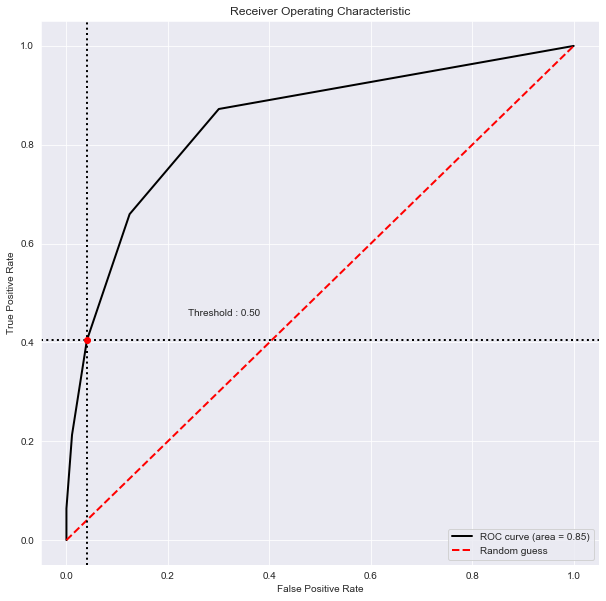

In [108]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = KN.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 7. Support Vector Machine (SVM)

In [109]:
from sklearn import svm
from sklearn.svm import SVC
svc = svm.SVC(probability=True)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)


In [110]:
print(classification_report(y_test, pred_svc))
svc_acc_score = accuracy_score(y_test, pred_svc)
print('The Accuracy score obtained by the SVM is->',svc_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

The Accuracy score obtained by the SVM is-> 87.5 %


#### Conclusion:A good Accuracy score by SVM .

Confusion Matrix:
 [[268   5]
 [ 35  12]]


Text(0.5, 257.44, 'Predicted label')

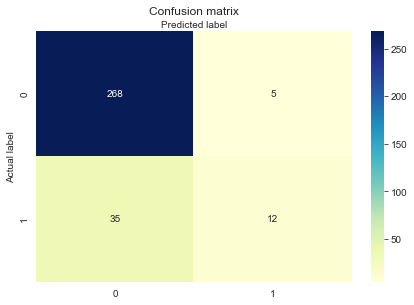

In [111]:
#Confusion matrix for the Support Vector classification
svc_conf_matrix = confusion_matrix(y_test, pred_svc)
print('Confusion Matrix:\n',svc_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(svc_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Test vs Predicted
### Compute training and test data accuracy

In [112]:
train_accuracy=svc.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = svc.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 89.83580922595777 %
Test data Accuracy-> 87.5 %


### Calculation of errors

In [113]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,pred_svc))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,pred_svc)))

Mean Squared Error(MSE): 0.125
Root Mean Squared Error (RMSE): 0.3535533905932738


### ROC_AUC_SCORE

In [114]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred_svc)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.6185020653105758


### ROC Curve

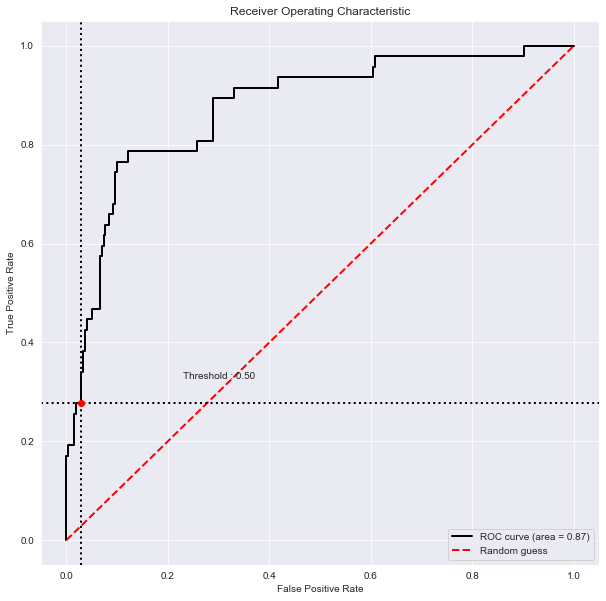

In [116]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = svc.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

### Finding best parameters for our SVM model

In [18]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,1.6,1.8,2.0,2.2],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,1.6,1.8,2.0,2.2]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)


In [19]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8,
                               2.0, 2.2],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.6,
                                   1.8, 2.0, 2.2],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [20]:
#Best parameters for our SVM model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [28]:
#Let's run our SVM again with the best parameters.
svc2 = svm.SVC(C = 1.2, gamma =  0.9, kernel= 'rbf',probability=True)
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))
svc2_acc_score = accuracy_score(y_test, pred_svc2)
print('The Accuracy score obtained by the SVM is->',svc2_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.85      0.36      0.51        47

    accuracy                           0.90       320
   macro avg       0.88      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320

The Accuracy score obtained by the SVM is-> 89.6875 %


#### Conclusion:SVM accuracy score increased from 87.5% to 89.6875% using GridSearch CV.

Confusion Matrix:
 [[270   3]
 [ 30  17]]


Text(0.5, 257.44, 'Predicted label')

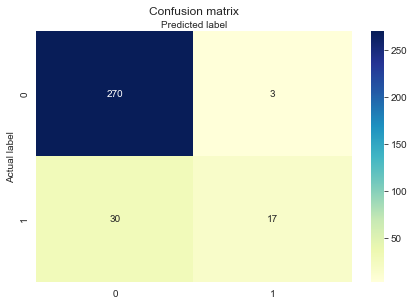

In [29]:
#Confusion matrix for the Support Vector classification (For improved results)
svc2_conf_matrix = confusion_matrix(y_test, pred_svc2)
print('Confusion Matrix:\n',svc2_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(svc2_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Test vs Predicted
### Compute training and test data accuracy

In [30]:
train_accuracy=svc2.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = svc2.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 98.27990617670055 %
Test data Accuracy-> 89.6875 %


### Calculation of Errors

In [31]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,pred_svc2))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,pred_svc2)))

Mean Squared Error(MSE): 0.103125
Root Mean Squared Error (RMSE): 0.3211308144666282


### ROC_AUC_SCORE

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred_svc2)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.6753565583352817


### ROC Curve

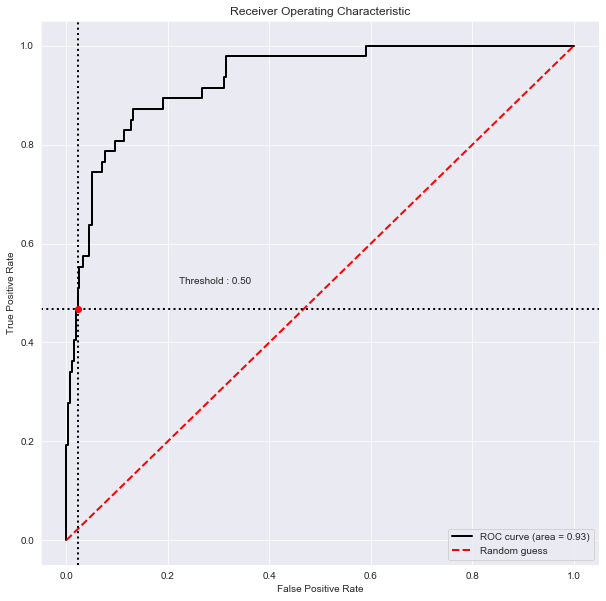

In [33]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = svc2.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

# FINAL CONCLUSION:From All the above Classification Algorithms we can see that the Support Vector Machine(SVM) algorithm which uses SVC(Support Vector Classifier) yields heighest Accuracy of 89.6875% which is approximately equal to 90% .      


# Along with SVM ,Random Forest Classifier also gives a  good Accuracy of 89%.






# (White Wine Dataset)

In [220]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [221]:
#Loading dataset
white_wine = pd.read_csv('C:\\Users\\asiya\\Downloads\\winequality-white.csv')

In [91]:
#Let's check how the data is distributed
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [92]:
#Lets check the total number of rows and columns present in the dataset
white_wine.shape

(4898, 12)

In [93]:
# Checking for Missing Values
print(white_wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [94]:
#Information about the data columns
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Problem Statement:
## Problem Definition:
### The white wine dataset also contains different chemical information about white wine. It has 4898 instances with 12 variables each. The dataset is good for classification and regression tasks. The model can be used to predict white wine quality.
### Perform various different algorithms like regression, decision tree, random forests, etc and differentiate between the models and analyse their performances.
### Here I am Performing various different Classification algorithms like Logistics Regression, Decision Tree Classifier, Random Forest Classifier, Stochastic Gradient Descent Classifier, Naive Bayes Classifier, K-NearestNeighbours Classifier and Support Vector Machine(SVM) and trying to differentiate between the models and analyse their performances.

## VISUALIZATION

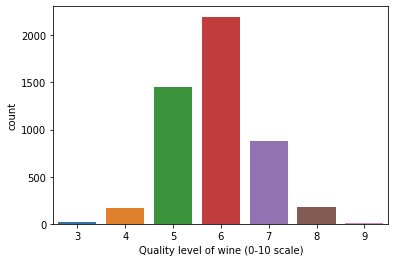

In [95]:
# Visualization  with countplots
white_wine["quality"] = pd.Categorical(white_wine["quality"])
sns.countplot(x="quality", data=white_wine)
plt.xlabel("Quality level of wine (0-10 scale)")
plt.show()

In [222]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

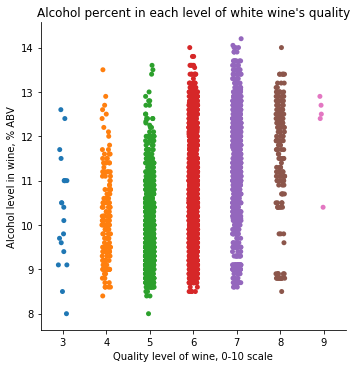

In [96]:
# Visualization  with factorplots
sns.factorplot(x="quality", y="alcohol", data=white_wine, kind="strip")
plt.xlabel("Quality level of wine, 0-10 scale")
plt.ylabel("Alcohol level in wine, % ABV")  #Alcohol By Volume(ABV)
plt.title("Alcohol percent in each level of white wine's quality")
plt.show()

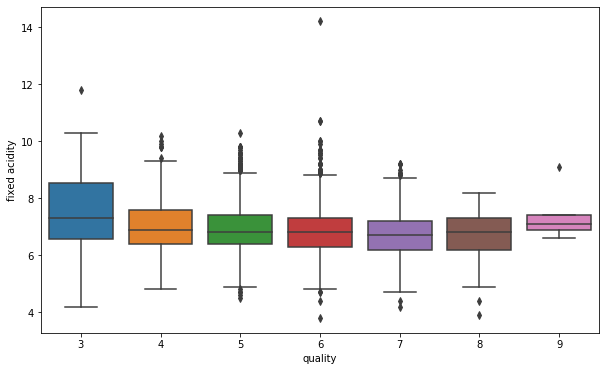

In [97]:
#Target variable is Quality. So we will plot a boxplot for each variable against target variable
fig = plt.figure(figsize = (10,6))
sns.boxplot('quality', 'fixed acidity', data = white_wine)

### Here we see that fixed acidity does not give any specification to classify the quality.

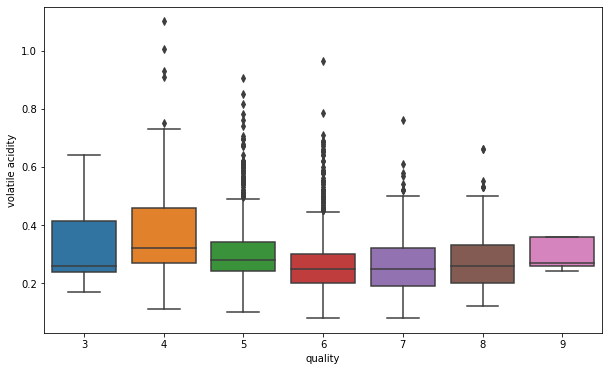

In [98]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'volatile acidity', data = white_wine)

### Here we see that the volatile acidity decreases toward the quality level of 5 to 8 and again a little increase in the volatile acidity at the quality level 9.

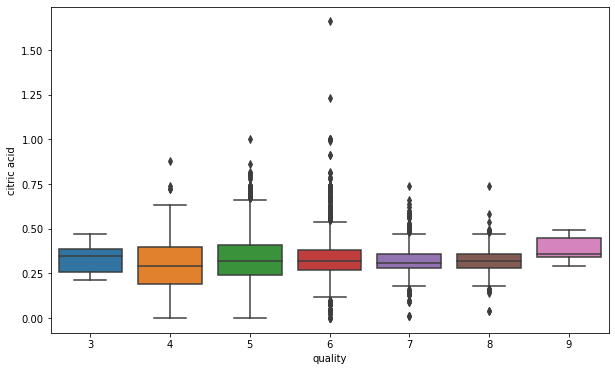

In [99]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'citric acid', data = white_wine)

### Here we see that the composition of the citric acid is quite uniform. 

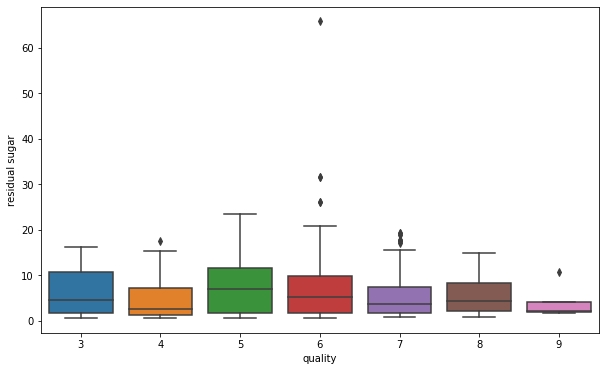

In [100]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'residual sugar', data = white_wine)

### Composition of residual sugar is uniformly distributed over the different quality level.

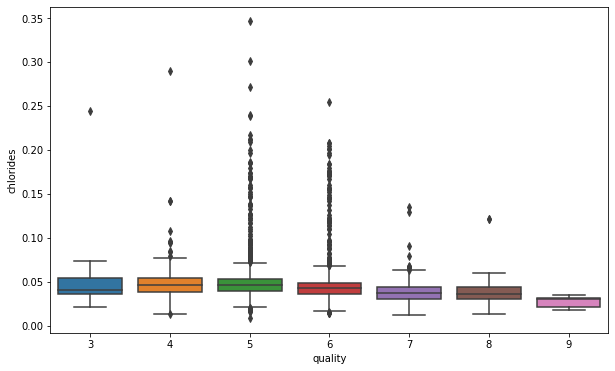

In [101]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'chlorides', data = white_wine)

### Composition of chlorides goes down as we go higher in the quality of the wine.

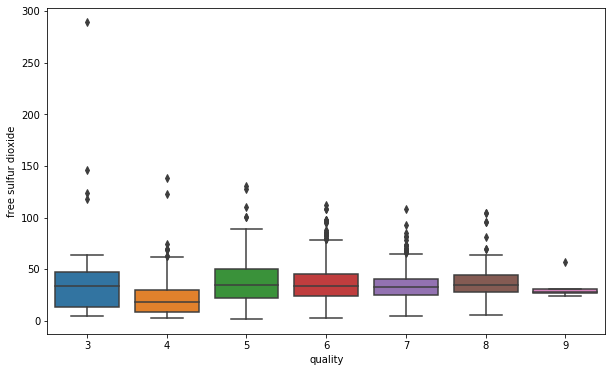

In [102]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'free sulfur dioxide', data = white_wine)

### Composition of free sulphur dioxide is somewhat uniformly distributed over the different quality level of white wine.

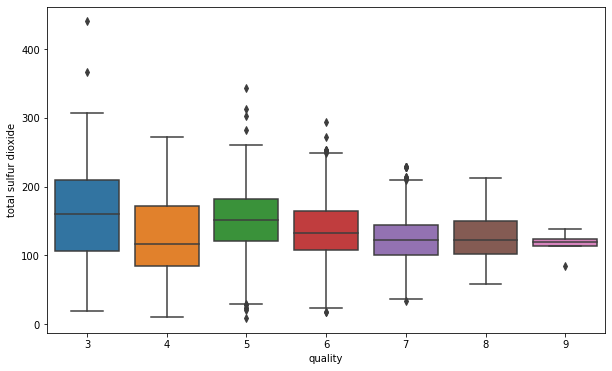

In [103]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = white_wine)

### Composition of total sulphur dioxide is approximately uniformly distributed with little variations at the higher quality levels.

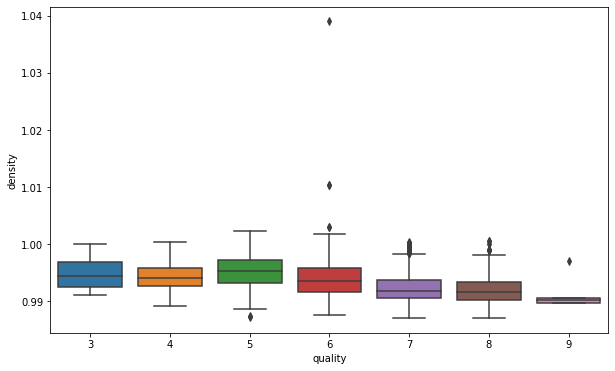

In [104]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'density', data = white_wine)

### Density of the white wine seems to be decreasing towards the increasing quality levels with little variations at low quality levels i. e quality levels 3 and 4.

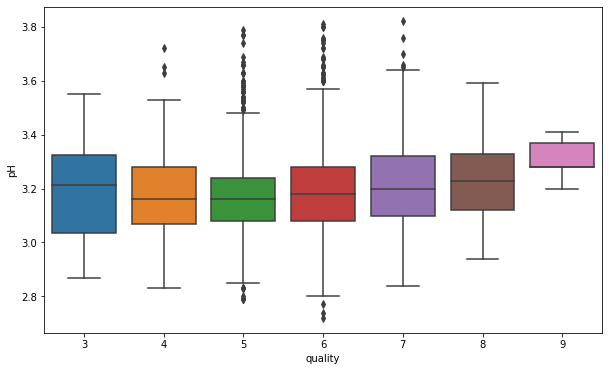

In [105]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'pH', data = white_wine)

### The pH levels of the white wine are quite increasing at the higher quality levels  and a bit decreasing at the quality  levels 4 and 5.

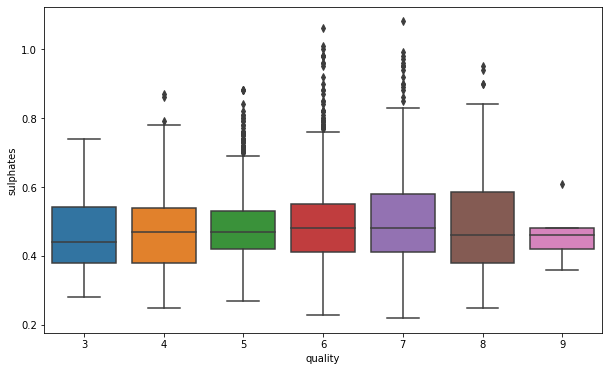

In [106]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'sulphates', data = white_wine)

### Composition of Sulphates is uniformly distributed.

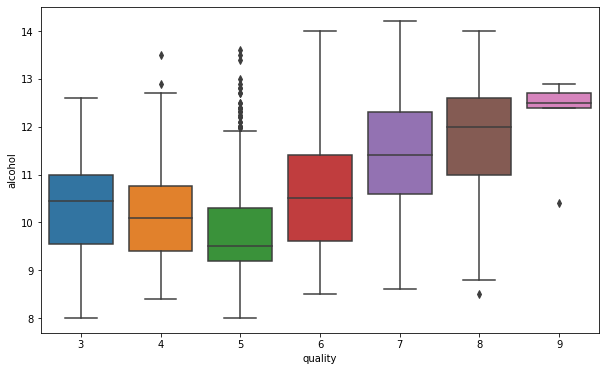

In [107]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'alcohol', data = white_wine)

### Composition of Alcohol increases with the increase in the quality level of white wine.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD63A26B70>,
      dtype=object)

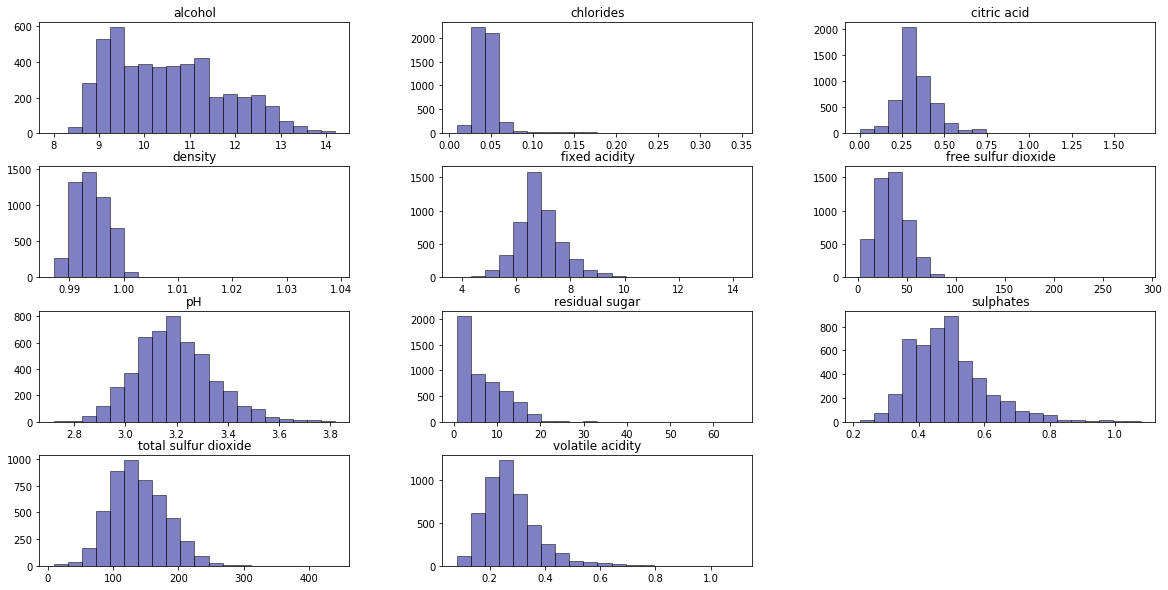

In [108]:
#Visualization using Histogram
white_wine.iloc[:,:-1].hist(bins=20,figsize=(20,10),
                           grid=False,edgecolor='black',alpha=0.5,color='darkblue')

### Histogram plots are very clear as we can see that all the 11 variables and their distribution in the white wine is clearly depicted.

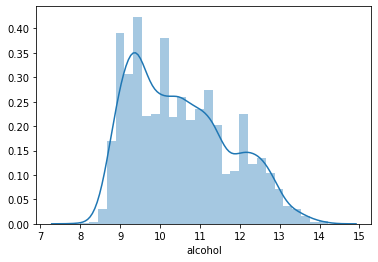

In [26]:
#Visualization using distplot
sns.distplot(white_wine.alcohol) #distplot shows how alcohol content is distributed in the white wine

In [109]:
#boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening.
white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267  
std       0.151001     0.114126     1.230621  
min       2.720000     0.220000     8.000000  
25%       3.090000     0.410000     9.500000  
50%       3.180000     0.470000    10.400000  
75%       3.280000     0.550000    11.400000  
max       3.820000     1.080000    14.200000

In [110]:
#Observations from the above data description.
#fixed acidity - 25% - 6.3 and 50% - 6.8 Not much of a variance. Could explain the huge number of outliers.
#volatile acididty - similar reasoning.
#citric acid - seems to be somewhat uniformly distributed.
#residual sugar - min - 0.6, max - 65!! Waaaaay too much difference.Could explain the outliers. 
#chlorides - Min - 0.009, max - 0.346

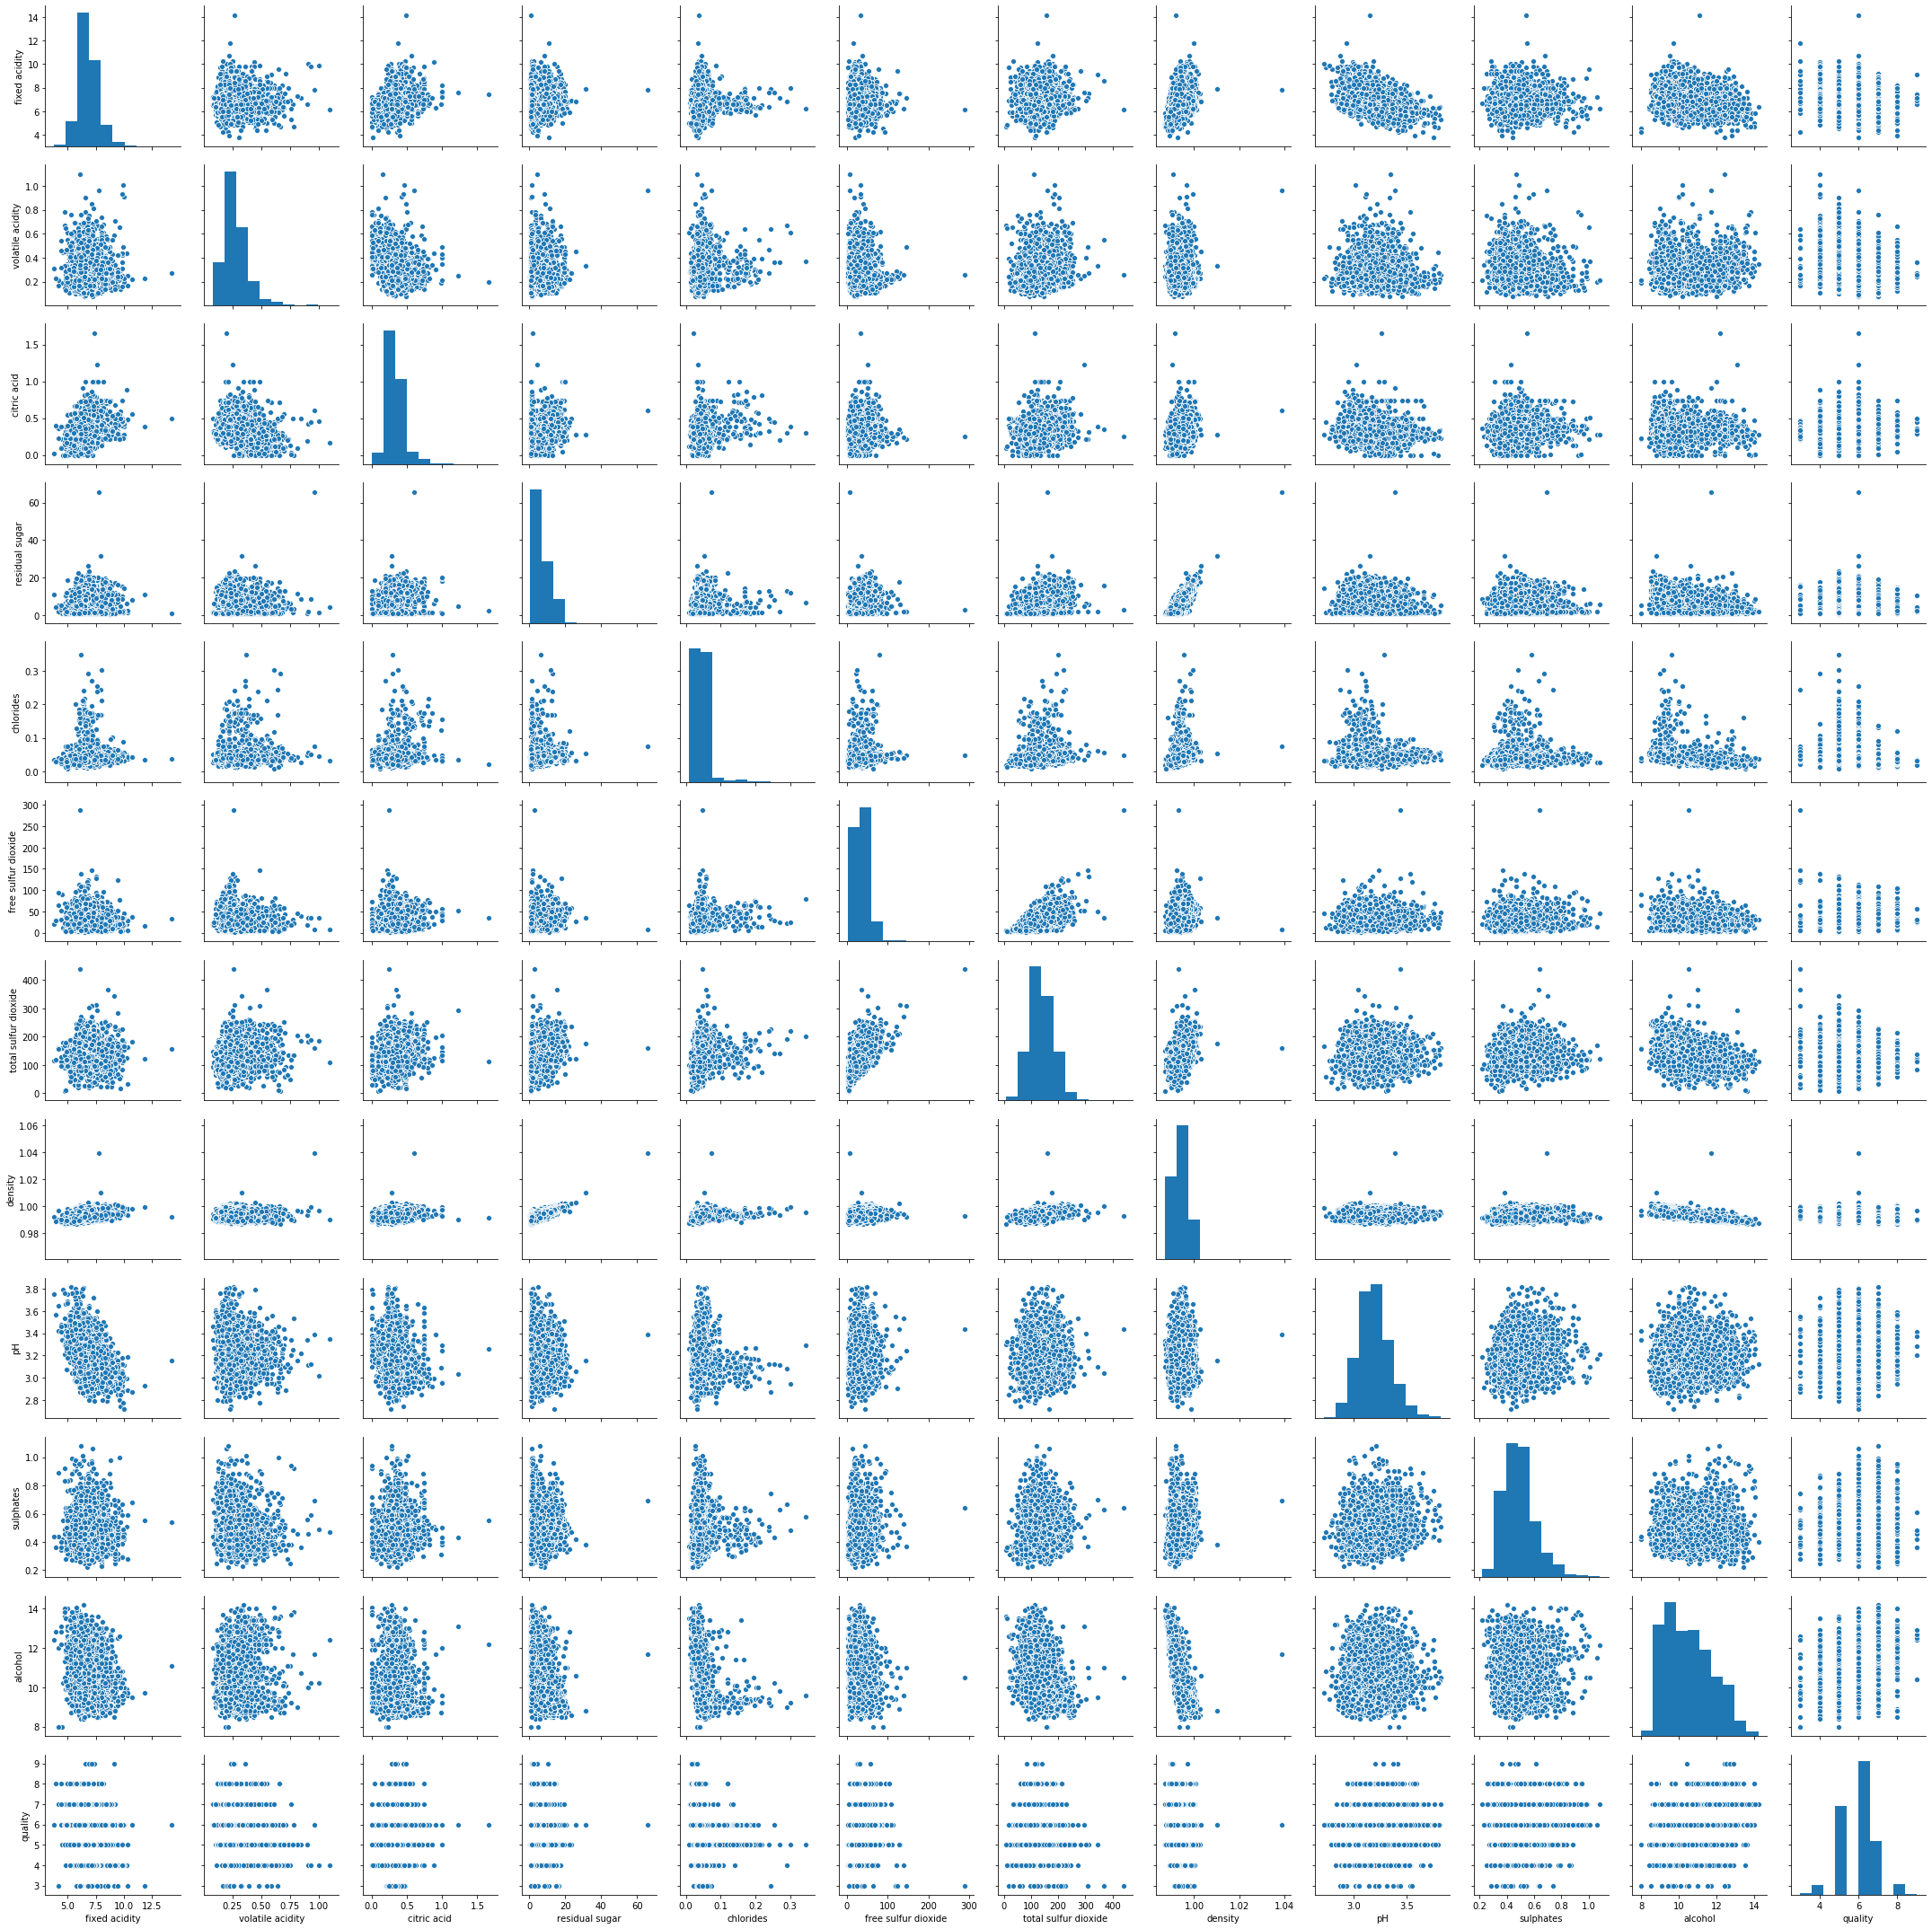

In [111]:
#Check correleation between the variables using Seaborn's pairplot. 
sns.pairplot(white_wine)

### No correlation between the fields as seen on the pairplot.

## Correlation Matrix

# Correlation Matrix
#### Next I wanted to see the correlations between the variables that I’m working with using correlation matrix. This allows me to get a much better understanding of the relationships between my variables quick glimpse.
#### Immediately, I can see that there are some variables that are strongly correlated to quality. It’s likely that these variables are also the most important features in our machine learning model.

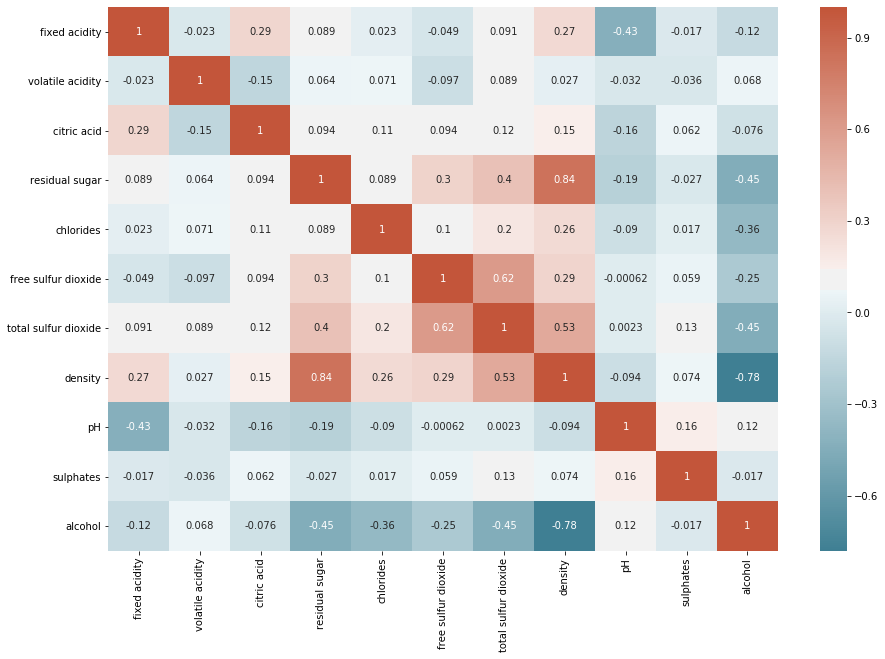

In [112]:
corr = white_wine.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Preprocessing Data for performing Machine learning algorithm

In [119]:
# Create Classification version of target variable
white_wine['goodquality'] = [1 if x >= 7 else 0 for x in white_wine['quality']]
# Separate feature variables and target variable
X = white_wine.drop(['quality','goodquality'], axis = 1)
y = white_wine['goodquality']

In [114]:
white_wine.head(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
1             6.3              0.30         0.34            1.60      0.049   
2             8.1              0.28         0.40            6.90      0.050   
3             7.2              0.23         0.32            8.50      0.058   
4             7.2              0.23         0.32            8.50      0.058   
5             8.1              0.28         0.40            6.90      0.050   
6             6.2              0.32         0.16            7.00      0.045   
7             7.0              0.27         0.36           20.70      0.045   
8             6.3              0.30         0.34            1.60      0.049   
9             8.1              0.22         0.43            1.50      0.044   
10            8.1              0.27         0.41            1.45      0.033   
11            8.6              0.23         0.40            4.20      0.035   
12            7.9              0.18         0.37            1.20      0.040   
13            6.6              0.16         0.40            1.50      0.044   
14            8.3              0.42         0.62           19.25      0.040   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
1                  14.0                 132.0   0.9940  3.30       0.49   
2                  30.0                  97.0   0.9951  3.26       0.44   
3                  47.0                 186.0   0.9956  3.19       0.40   
4                  47.0                 186.0   0.9956  3.19       0.40   
5                  30.0                  97.0   0.9951  3.26       0.44   
6                  30.0                 136.0   0.9949  3.18       0.47   
7                  45.0                 170.0   1.0010  3.00       0.45   
8                  14.0                 132.0   0.9940  3.30       0.49   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   

    alcohol quality  goodquality  
0       8.8       6            0  
1       9.5       6            0  
2      10.1       6            0  
3       9.9       6            0  
4       9.9       6            0  
5      10.1       6            0  
6       9.6       6            0  
7       8.8       6            0  
8       9.5       6            0  
9      11.0       6            0  
10     12.0       5            0  
11      9.7       5            0  
12     10.8       5            0  
13     12.4       7            1  
14      9.7       5            0

In [115]:
white_wine['goodquality'].value_counts()

0    3838
1    1060
Name: goodquality, dtype: int64

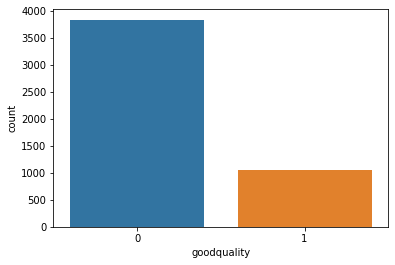

In [116]:
sns.countplot(white_wine['goodquality'])

In [117]:
# Filtering the data only for good quality
wine_temp = white_wine[white_wine['goodquality']==1]
wine_temp.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1060.000000       1060.000000  1060.000000     1060.000000   
mean        6.725142          0.265349     0.326057        5.261509   
std         0.768798          0.094097     0.080288        4.290845   
min         3.900000          0.080000     0.010000        0.800000   
25%         6.200000          0.190000     0.280000        1.800000   
50%         6.700000          0.250000     0.310000        3.875000   
75%         7.200000          0.320000     0.360000        7.400000   
max         9.200000          0.760000     0.740000       19.250000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1060.000000          1060.000000           1060.000000  1060.000000   
mean      0.038160            34.550472            125.245283     0.992412   
std       0.011145            13.797146             32.724848     0.002772   
min       0.012000             5.000000             34.000000     0.987110   
25%       0.031000            25.000000            101.000000     0.990500   
50%       0.037000            33.000000            122.000000     0.991730   
75%       0.044000            42.000000            146.000000     0.993605   
max       0.135000           108.000000            229.000000     1.000600   

                pH    sulphates      alcohol  goodquality  
count  1060.000000  1060.000000  1060.000000       1060.0  
mean      3.215132     0.500142    11.416022          1.0  
std       0.157185     0.133044     1.255209          0.0  
min       2.840000     0.220000     8.500000          1.0  
25%       3.100000     0.400000    10.700000          1.0  
50%       3.200000     0.480000    11.500000          1.0  
75%       3.320000     0.580000    12.400000          1.0  
max       3.820000     1.080000    14.200000          1.0

In [118]:
# Filtering the data only for bad  quality
wine_temp2 = white_wine[white_wine['goodquality']==0]
wine_temp2.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3838.000000       3838.000000  3838.000000     3838.000000   
mean        6.890594          0.281802     0.336438        6.703478   
std         0.860108          0.102293     0.129959        5.225048   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.220000     0.260000        1.700000   
50%         6.800000          0.270000     0.320000        6.000000   
75%         7.400000          0.320000     0.400000       10.400000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3838.000000          3838.000000           3838.000000  3838.000000   
mean      0.047875            35.517327            141.982934     0.994474   
std       0.023548            17.787825             44.145402     0.002894   
min       0.009000             2.000000              9.000000     0.987220   
25%       0.037000            23.000000            111.000000     0.992320   
50%       0.045000            34.000000            140.000000     0.994380   
75%       0.051000            47.000000            173.000000     0.996570   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  goodquality  
count  3838.000000  3838.000000  3838.000000       3838.0  
mean      3.180847     0.487004    10.265215          0.0  
std       0.148414     0.108167     1.100576          0.0  
min       2.720000     0.230000     8.000000          0.0  
25%       3.080000     0.410000     9.400000          0.0  
50%       3.170000     0.470000    10.000000          0.0  
75%       3.267500     0.540000    11.000000          0.0  
max       3.810000     1.060000    14.000000          0.0

### By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average.

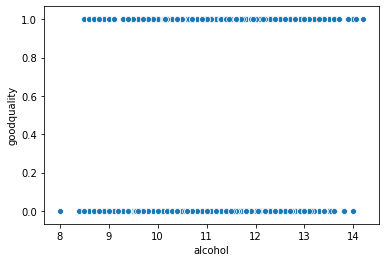

In [119]:
#Lets try to see the relationship between the variables goodquality and the alocohol.
sns.scatterplot(x='alcohol',y='goodquality',data=white_wine)

### From the above scatterplot we can see that the alcohol content for the wine having goodquality=0 is lower and alcohol content for the wine having goodquality=1 is higher. 

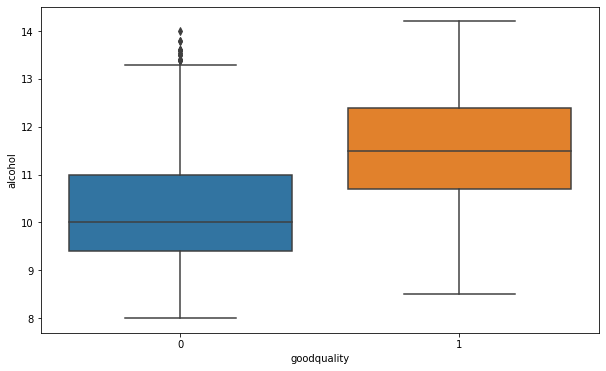

In [23]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'goodquality', y = 'alcohol', data = white_wine)

### From the above boxplot we can see that the alcohol content for the wine having goodquality=0 is lower and alcohol content for the wine having goodquality=1 is higher. 

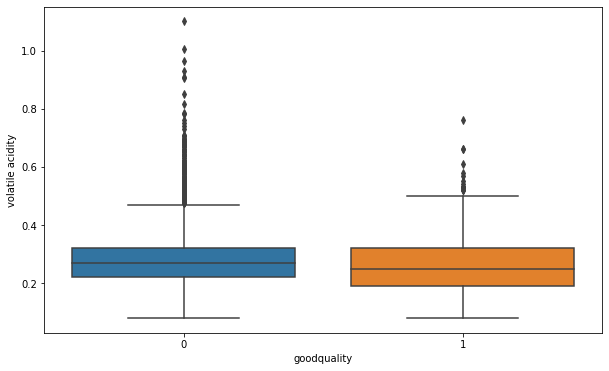

In [24]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'goodquality', y = 'volatile acidity', data = white_wine)

### From the above boxplot we can see that the volatile acidity content for the wine having goodquality=0 is heigher and volatile acidity content for the wine having goodquality=1 is lower. 

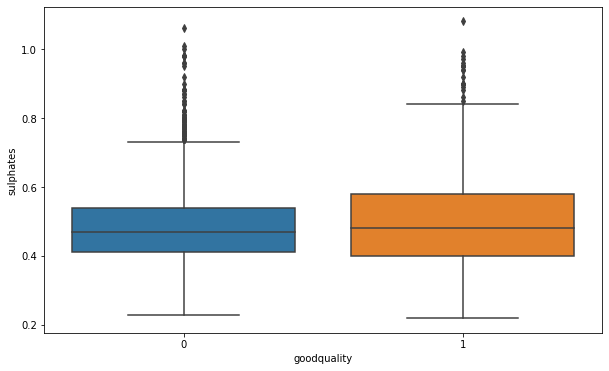

In [25]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'goodquality', y = 'sulphates', data = white_wine)

### From the above boxplot we can see that the sulphates content for the wine having goodquality=0 is lower and sulphates content for the wine having goodquality=1 is heigher. 

## Preparing Data for Modelling


In [120]:
# Normalize feature variables
X_features = X
X = StandardScaler().fit_transform(X)#Applying Standard scaling to get optimized result
                                    #cleaning and normalizing the input features


## Splitting data into training and testing set

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
#Let's Check how our train and test data is distributed
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 11)
(980, 11)
(3918,)
(980,)


### Our training and testing data is ready now to fit into various machine learning algorithms.

## Modelling

# For this Project,I have applied 7  different types of Classification Algorithms listed Below:

#### 1.Logistic Regression 
#### 2.Decision Tree Classifier 
#### 3.Random Forest Classifier
#### 4.Stochastic Gradient Descent Classifier 
#### 5.Naive Bayes Classsifier
#### 6.K-NearestNeighbours Classifier
#### 7.Support Vector Machine

## 1.Logistic Regression 

In [130]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [131]:
print(classification_report(y_test, lr_predict))
lr_acc_score = accuracy_score(y_test, lr_predict)
print("The Accuracy score obtained by the Logistic Regression is->",(lr_acc_score*100),"%")

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       753
           1       0.58      0.28      0.38       227

    accuracy                           0.79       980
   macro avg       0.70      0.61      0.63       980
weighted avg       0.76      0.79      0.76       980

The Accuracy score obtained by the Logistic Regression is-> 78.6734693877551 %


Confusion Matrix:
 [[707  46]
 [163  64]]


Text(0.5, 257.44, 'Predicted label')

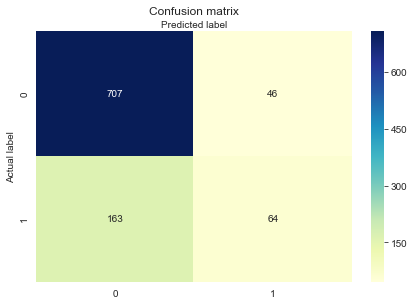

In [132]:
#Confusion matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
print('Confusion Matrix:\n',lr_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(lr_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Test vs Predicted
### Compute training and test data accuracy

In [133]:
train_accuracy=lr.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = lr.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 80.62787136294027 %
Test data Accuracy-> 78.6734693877551 %


### Calculation of Errors

In [134]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,lr_predict))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,lr_predict)))

Mean Squared Error(MSE): 0.21326530612244898
Root Mean Squared Error (RMSE): 0.4618065678641318


### ROC_AUC_SCORE

In [135]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, lr_predict)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.6104246742837753


### ROC Curve

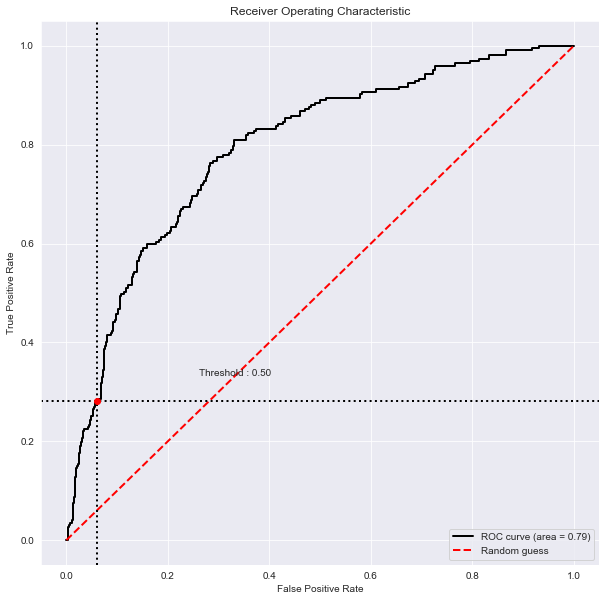

In [136]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = lr.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 2.Decision Tree Classifier

In [137]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [138]:
#print confusion matrix and accuracy score
print(classification_report(y_test, dt_predict))
dt_acc_score = accuracy_score(y_test, dt_predict)
print('The Accuracy score obtained by the Decision Tree Classifier is->',dt_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       753
           1       0.61      0.67      0.64       227

    accuracy                           0.83       980
   macro avg       0.76      0.77      0.76       980
weighted avg       0.83      0.83      0.83       980

The Accuracy score obtained by the Decision Tree Classifier is-> 82.55102040816327 %


#### Conclusion:The Accuaracy score given by the Decision Tree Classifier is better than the Accuray score given by the Logistic Regression.

Confusion Matrix:
 [[657  96]
 [ 75 152]]


Text(0.5, 257.44, 'Predicted label')

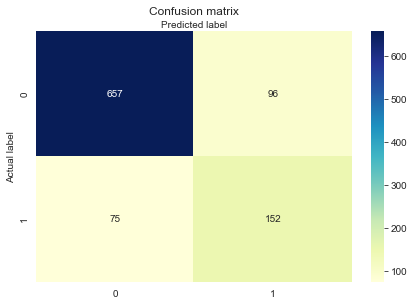

In [139]:
#Confusion matrix for Decision Tree Classification
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
print('Confusion Matrix:\n',dt_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(dt_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### Test vs Predicted
### Compute training and test data accuracy

In [140]:
train_accuracy=dt.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = dt.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 100.0 %
Test data Accuracy-> 82.55102040816327 %


### Calculation of Errors

In [141]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,dt_predict))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,dt_predict)))

Mean Squared Error(MSE): 0.17448979591836736
Root Mean Squared Error (RMSE): 0.4177197576346699


### ROC_AUC_SCORE

In [142]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, dt_predict)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.7710567421942187


### ROC Curve

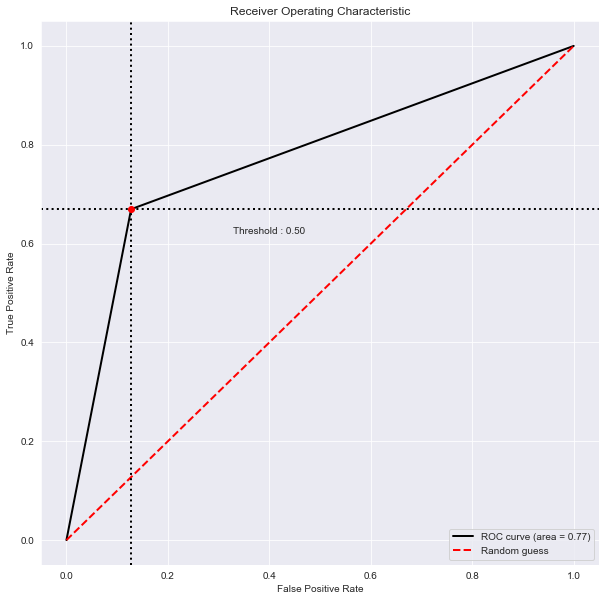

In [143]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = dt.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 3. Random Forest Classifier

In [144]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [145]:
print(classification_report(y_test, pred_rfc))
rf_acc_score = accuracy_score(y_test, pred_rfc)
print("The Accuracy score obtained by the Random Forest Classifier is->",rf_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       753
           1       0.83      0.57      0.68       227

    accuracy                           0.87       980
   macro avg       0.86      0.77      0.80       980
weighted avg       0.87      0.87      0.87       980

The Accuracy score obtained by the Random Forest Classifier is-> 87.44897959183675 %


#### Conclusion:Random Forest Classifier gives us a good accuracy score compared to the above two Classsifiers.

Confusion Matrix:
 [[727  26]
 [ 97 130]]


Text(0.5, 257.44, 'Predicted label')

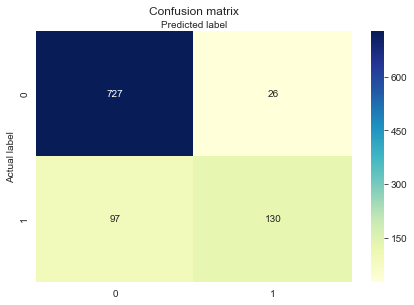

In [146]:
#Confusion matrix for the random forest classification
rf_conf_matrix = confusion_matrix(y_test, pred_rfc)
print('Confusion Matrix:\n',rf_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(rf_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### Test vs Predicted
### Compute training and test data accuracy

In [147]:
train_accuracy=rfc.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = rfc.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 98.87697805002553 %
Test data Accuracy-> 87.44897959183675 %


### Calculation of Errors

In [148]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,pred_rfc))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,pred_rfc)))

Mean Squared Error(MSE): 0.12551020408163266
Root Mean Squared Error (RMSE): 0.35427419336106414


### ROC_AUC_SCORE

In [149]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred_rfc)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.7690793361063821


### ROC Curve

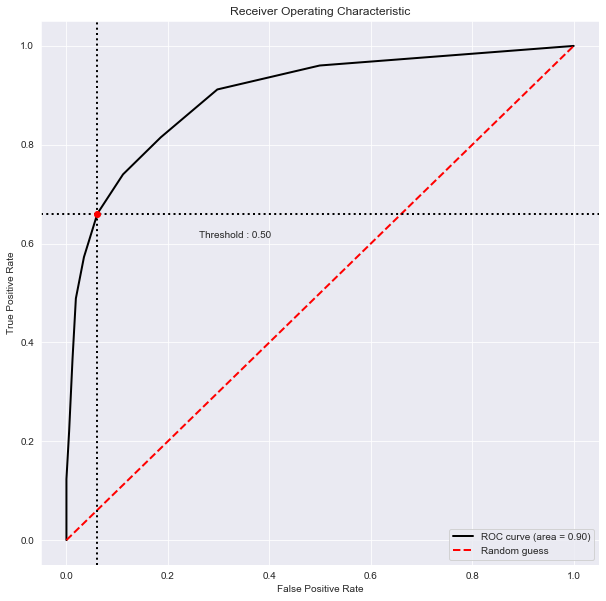

In [161]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = rfc.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 4. Stochastic Gradient Decent Classifier

In [166]:
sgd = SGDClassifier(loss="modified_huber")
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [167]:
#print confusion matrix and accuracy score
print(classification_report(y_test, pred_sgd))
sgd_acc_score = accuracy_score(y_test, pred_sgd)
print('The Accuracy score obtained by the Stochastic Gradient Decent Classifier is->',sgd_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       753
           1       0.51      0.55      0.53       227

    accuracy                           0.77       980
   macro avg       0.68      0.69      0.69       980
weighted avg       0.78      0.77      0.78       980

The Accuracy score obtained by the Stochastic Gradient Decent Classifier is-> 77.24489795918367 %


#### Conclusion:Stochastic Gradient Decent Classifier gave a much lower accuracy score as compared to all the above Classification Algorithms.

Confusion Matrix:
 [[632 121]
 [102 125]]


Text(0.5, 257.44, 'Predicted label')

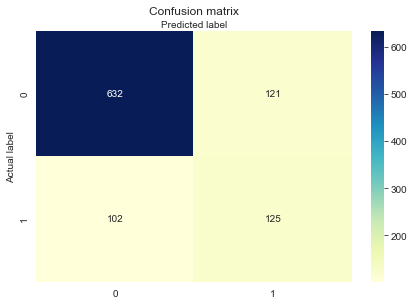

In [168]:
#Confusion matrix for the Stochastic Gradient Decent classification
sgd_conf_matrix = confusion_matrix(y_test, pred_sgd)
print('Confusion Matrix:\n',sgd_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(sgd_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### Test vs Predicted
### Compute training and test data accuracy

In [169]:
train_accuracy=sgd.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = sgd.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 77.97345584481879 %
Test data Accuracy-> 77.24489795918367 %


### Calculation of Errors

In [170]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,pred_sgd))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,pred_sgd)))

Mean Squared Error(MSE): 0.22755102040816327
Root Mean Squared Error (RMSE): 0.4770230816304


### ROC_AUC_SCORE

In [171]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred_sgd)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.6949851109512025


### ROC Curve

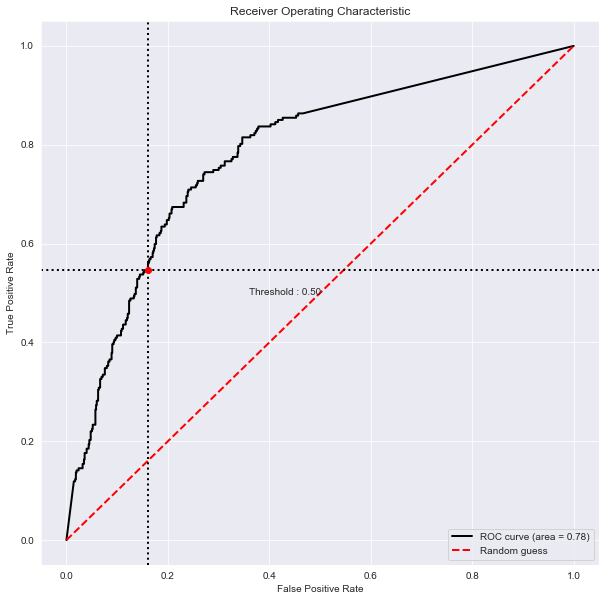

In [172]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = sgd.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 5.Naive Bayes Classifier

In [173]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

In [174]:
print(classification_report(y_test, nb_predict))
nb_acc_score = accuracy_score(y_test, nb_predict)
print('The Accuracy score obtained by the Naive Bayes Classifier is->',nb_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       753
           1       0.43      0.70      0.53       227

    accuracy                           0.71       980
   macro avg       0.66      0.71      0.66       980
weighted avg       0.78      0.71      0.73       980

The Accuracy score obtained by the Naive Bayes Classifier is-> 71.22448979591837 %


#### Conclusion:Naive Bayes Classifier did not give a good Accuracy score as compared to the above four Classification Algorithms.

Confusion Matrix:
 [[539 214]
 [ 68 159]]


Text(0.5, 257.44, 'Predicted label')

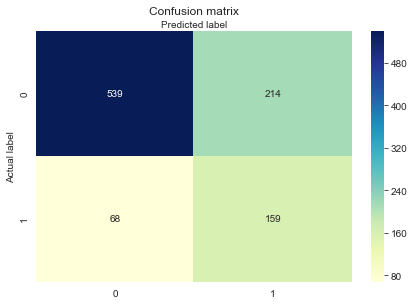

In [175]:
#Confusion matrix for the Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
print('Confusion Matrix:\n',nb_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(nb_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Test vs Predicted
### Compute training and test data accuracy

In [176]:
train_accuracy=nb.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = nb.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 73.22613578356304 %
Test data Accuracy-> 71.22448979591837 %


### Calculation of Errors

In [179]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,nb_predict))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,nb_predict)))

Mean Squared Error(MSE): 0.28775510204081634
Root Mean Squared Error (RMSE): 0.5364280958719596


### ROC_AUC_SCORE

In [177]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, nb_predict)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.7081219907448034


### ROC Curve

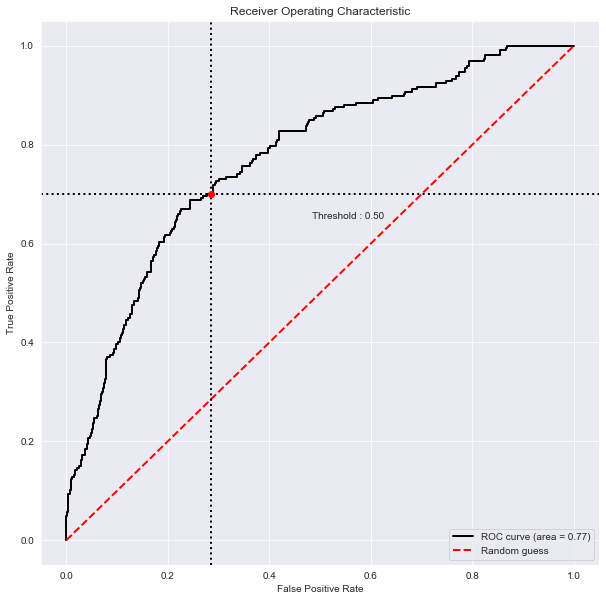

In [178]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = nb.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 6. K-NearestNeighbours Classifier

In [180]:
KN= KNeighborsClassifier(n_neighbors=5)
KN.fit(X_train,y_train)
KN_predict=KN.predict(X_test)

In [181]:
print(classification_report(y_test, KN_predict))
KN_acc_score = accuracy_score(y_test, KN_predict)
print('The Accuracy score obtained by the K-NearestNeighbours Classifier is->',KN_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       753
           1       0.69      0.54      0.61       227

    accuracy                           0.84       980
   macro avg       0.78      0.73      0.75       980
weighted avg       0.83      0.84      0.83       980

The Accuracy score obtained by the K-NearestNeighbours Classifier is-> 83.77551020408164 %


#### Conclusion:K-NearestNeighbours Classifier gave a good Accuaracy score as compared to the Above two Naive Bayes and SGD Classification Algorithms.

Confusion Matrix:
 [[698  55]
 [104 123]]


Text(0.5, 257.44, 'Predicted label')

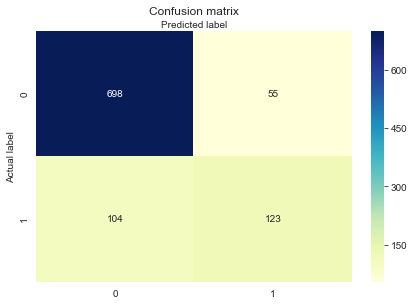

In [182]:
#Confusion matrix for the K-NearestNeighbours Classification
KN_conf_matrix = confusion_matrix(y_test, KN_predict)
print('Confusion Matrix:\n',KN_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(KN_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### Test vs Predicted
### Compute training and test data accuracy

In [183]:
train_accuracy=KN.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = KN.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 88.13169984686064 %
Test data Accuracy-> 83.77551020408164 %


### Calculation of Errors

In [185]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,KN_predict))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,KN_predict)))

Mean Squared Error(MSE): 0.16224489795918368
Root Mean Squared Error (RMSE): 0.40279634799633385


### ROC_AUC_SCORE

In [186]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, KN_predict)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.7344045258028092


### ROC Curve

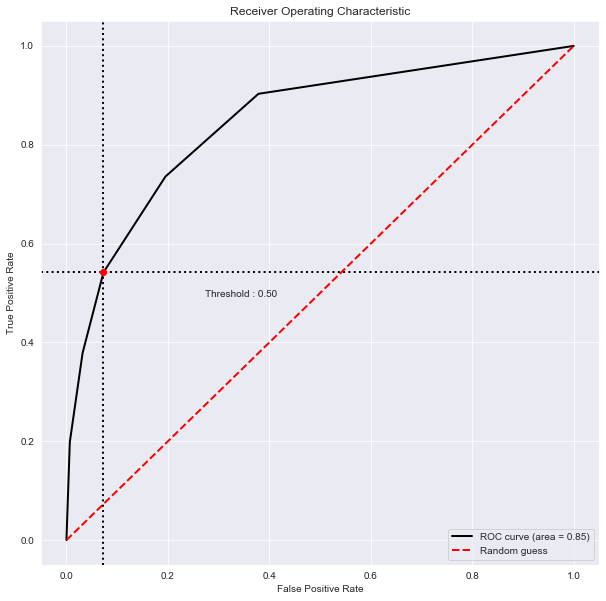

In [188]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = KN.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## 7. Support Vector Machine (SVM)

In [201]:
from sklearn import svm
from sklearn.svm import SVC
svc = svm.SVC(probability=True)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [202]:
print(classification_report(y_test, pred_svc))
svc_acc_score = accuracy_score(y_test, pred_svc)
print('The Accuracy score obtained by the SVM is->',svc_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       753
           1       0.75      0.34      0.47       227

    accuracy                           0.82       980
   macro avg       0.79      0.65      0.68       980
weighted avg       0.81      0.82      0.79       980

The Accuracy score obtained by the SVM is-> 82.14285714285714 %


#### Conclusion:The Accuracy score given by the Support Vector Machine(SVM) is not so good let's find out the best parameters for SVM  . 

Confusion Matrix:
 [[728  25]
 [150  77]]


Text(0.5, 257.44, 'Predicted label')

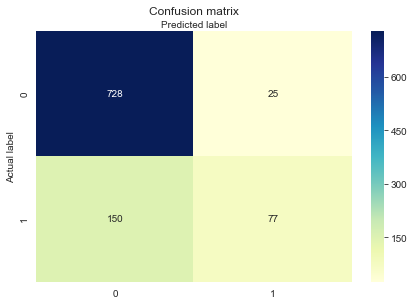

In [203]:
#Confusion matrix for the Support Vector classification
svc_conf_matrix = confusion_matrix(y_test, pred_svc)
print('Confusion Matrix:\n',svc_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(svc_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Test vs Predicted
### Compute training and test data accuracy

In [204]:
train_accuracy=svc.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = svc.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 84.4818785094436 %
Test data Accuracy-> 82.14285714285714 %


### Calculation of Errors

In [205]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,pred_svc))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,pred_svc)))

Mean Squared Error(MSE): 0.17857142857142858
Root Mean Squared Error (RMSE): 0.4225771273642583


### ROC_AUC_SCORE

In [206]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred_svc)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.6530032586248252


### ROC Curve

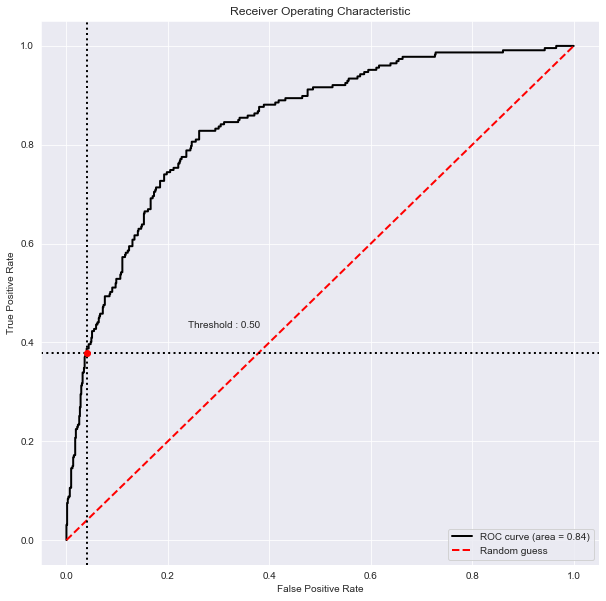

In [207]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = svc.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

### Finding best parameters for our SVM model

In [208]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,1.6,1.8,2.0,2.2],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,1.6,1.8,2.0,2.2]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [209]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8,
                               2.0, 2.2],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.6,
                                   1.8, 2.0, 2.2],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [210]:
#Best parameters for our SVM model
grid_svc.best_params_

{'C': 1.6, 'gamma': 1.2, 'kernel': 'rbf'}

In [211]:
#Let's run our SVM again with the best parameters.
svc2 = svm.SVC(C = 1.6, gamma =  1.2, kernel= 'rbf',probability=True)
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))
svc2_acc_score = accuracy_score(y_test, pred_svc2)
print('The Accuracy score obtained by the SVM is->',svc2_acc_score*100,'%')

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       753
           1       0.84      0.55      0.67       227

    accuracy                           0.87       980
   macro avg       0.86      0.76      0.79       980
weighted avg       0.87      0.87      0.86       980

The Accuracy score obtained by the SVM is-> 87.24489795918367 %


### Conclusion:SVM accuracy score increased from 82.1428% to 87.2448% using GridSearch CV.

Confusion Matrix:
 [[730  23]
 [102 125]]


Text(0.5, 257.44, 'Predicted label')

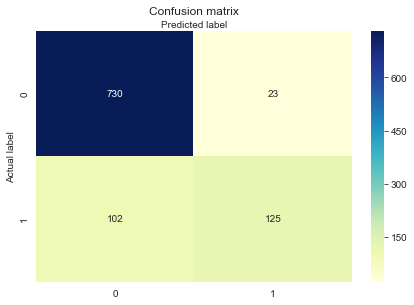

In [212]:
#Confusion matrix for the Support Vector classification (For improved results)
svc2_conf_matrix = confusion_matrix(y_test, pred_svc2)
print('Confusion Matrix:\n',svc2_conf_matrix)

class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(svc2_conf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Test vs Predicted
### Compute training and test data accuracy

In [213]:
train_accuracy=svc2.score(X_train, y_train) 
print('Train data Accuracy->',(train_accuracy)*100,'%')

test_accuracy = svc2.score(X_test, y_test) 
print('Test data Accuracy->',(test_accuracy)*100,'%')

Train data Accuracy-> 99.5405819295559 %
Test data Accuracy-> 87.24489795918367 %


### Calculation of Errors

In [214]:
from sklearn.metrics import mean_squared_error 
print ('Mean Squared Error(MSE):', mean_squared_error(y_test,pred_svc2))

from math import sqrt
print('Root Mean Squared Error (RMSE):',sqrt(mean_squared_error( y_test,pred_svc2)))

Mean Squared Error(MSE): 0.12755102040816327
Root Mean Squared Error (RMSE): 0.35714285714285715


### ROC_AUC_SCORE

In [215]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred_svc2)
print('ROC_AUC_SCORE->',roc_auc)

ROC_AUC_SCORE-> 0.7600581521198613


### ROC Curve

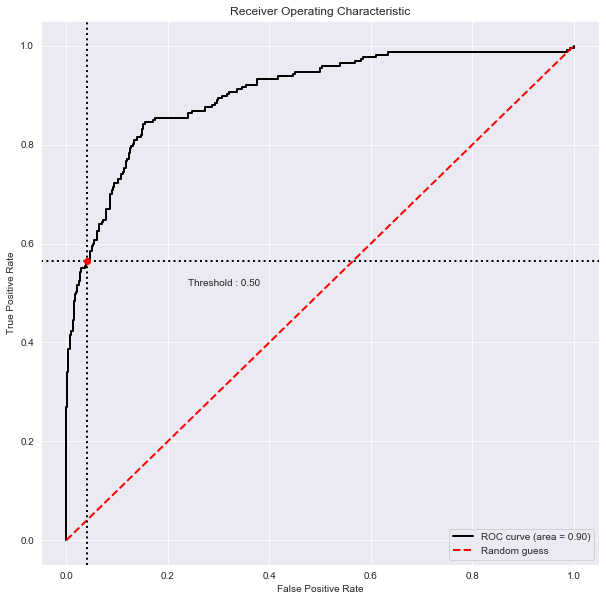

In [216]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_pred_proba = svc2.predict_proba(X_test)[::,1]
bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

# FINAL CONCLUSION:From All the above Classification Algorithms we can see that the Random Forest Classifier and the Support Vector Machine(SVM) algorithm which uses SVC(Support Vector Classifier) yields heighest Accuracy which is approximately equal to 87%.